In [1]:
import sqlite3
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [2]:
data_list_con=[]
Filename="db_table_name.xlsx"
df=pd.read_excel(Filename,sheet_name=1)

In [3]:
df

,file_name,db_name,db_table
0,final_project.ipynb,province_divorce_rate,divorce_rate
1,region_gdp,region_gdp,regional_gdp
2,consume_index,consume_index,consume
3,illteracy_rate,illteracy_rate,illteracy
4,sample_age_over15,sample_age_over15,sample_pop
5,urban population density,urban_pop_density,density
6,higher_pop_rate,higher_pop_rate,highedu
7,the_birth_rate,birth_rate,birth
8,research_family_people,family_people,family_peoplenum
9,total_family_num,total_family_num,family_num


In [4]:
len(df)

14

In [5]:
df_sum=pd.DataFrame()

In [6]:
db_sheet=str(df.iloc[0,1])+'.xlsx'
db_sheet

dfi=pd.read_excel(db_sheet)
print(dfi.columns)
dfi=dfi.melt(id_vars='reg',var_name='Year',value_name=df.iloc[0,2])

dfi.iloc[91:120,:]
dupl=dfi.duplicated(subset=['reg','Year'])

any(dupl)

Index(['reg', '2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011',
       '2010'],
      dtype='object')


False

In [7]:
db_sheet=str(df.iloc[1,1])+'.xlsx'
db_sheet

df2=pd.read_excel(db_sheet)
print(df2.columns)
df2=df2.melt(id_vars='reg',var_name='Year',value_name=df.iloc[1,2])

df2.iloc[91:120,:]

Index(['reg', '2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012',
       '2011', '2010', '2009', '2008', '2007', '2006', '2005', '2004', '2003',
       '2002', '2001', '2000'],
      dtype='object')


,reg,Year,regional_gdp
91,宁夏回族自治区,2017,3443.56
92,新疆维吾尔自治区,2017,10881.96
93,北京市,2016,25669.13
94,天津市,2016,17885.39
95,上海市,2016,28178.65
96,重庆市,2016,17740.59
97,河北省,2016,32070.45
98,山西省,2016,13050.41
99,内蒙古自治区,2016,18128.10
100,辽宁省,2016,22246.90


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620 entries, 0 to 619
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   reg           620 non-null    object 
 1   Year          620 non-null    object 
 2   regional_gdp  620 non-null    float64
dtypes: float64(1), object(2)
memory usage: 14.7+ KB


In [9]:
df_sum=pd.merge(dfi,df2,on=["reg","Year"],how="outer")

In [10]:
df_sum

,reg,Year,divorce_rate,regional_gdp
0,北京市,2018,3.427825,33105.97
1,天津市,2018,4.111147,13362.92
2,上海市,2018,2.438029,36011.82
3,重庆市,2018,4.963452,21588.80
4,河北省,2018,3.110862,32494.61
...,...,...,...,...
615,陕西省,2000,NaN,1804.00
616,甘肃省,2000,NaN,1052.88
617,青海省,2000,NaN,263.68
618,宁夏回族自治区,2000,NaN,295.02


In [71]:
df_sum.to_excel('df_test.xlsx',sheet_name='test12')

In [72]:
any(df_sum.duplicated(subset=['reg','Year']))

False

In [14]:
for i in range(16):
    db_name=str(df.iloc[i,1])+'.db'
    db_sheet_name=str(df.iloc[i,2])
    db_xls=str(df.iloc[i,1])+'.xlsx'
    print(i)
    conn=sqlite3.connect(db_name)
    
    query="SELECT * FROM '%s'" %db_sheet_name
    
    df2 = pd.read_sql(query, conn)
    
    df2.to_excel(db_xls,sheet_name=db_sheet_name)
    
    conn.close()


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


In [50]:
df_sum=pd.DataFrame()

for i in range(len(df)):
    db_sheet=str(df.iloc[i,1])+'.xlsx'

    dfi=pd.read_excel(db_sheet)
    dfi=dfi.melt(id_vars='reg',var_name='Year',value_name=df.iloc[i,2])
    if i==0:
        df_sum=dfi
    else:
        df_sum=pd.merge(df_sum,dfi,on=["reg","Year"],how="outer")

In [51]:
df_sum

,reg,Year,divorce_rate,regional_gdp,consume,illteracy,sample_pop,density,highedu,birth,family_peoplenum,family_num,House_Price,tertiary_gdp,raising_rate,sex_ratio
0,北京市,2018,3.427825,33105.97,102.488458,268,15823,1135.527118,5268.0,8.24,16773,6769,37420.188541,27508.06,13.37,98.75
1,天津市,2018,4.111147,13362.92,101.950745,159,11480,5016.304411,4150.0,6.67,11278,4529,15924.260523,8352.32,13.03,115.72
2,上海市,2018,2.438029,36011.82,101.588254,426,17922,3822.695371,3517.0,7.20,19368,8139,28981.105706,25546.26,13.08,106.61
3,重庆市,2018,4.963452,21588.80,102.047067,808,21113,2026.424731,3081.0,11.02,24920,8685,8189.976022,11367.89,24.68,100.35
4,河北省,2018,3.110862,32494.61,102.448942,1994,50466,3210.355015,2457.0,11.26,61115,19693,7566.719898,16251.96,26.85,101.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,陕西省,2000,NaN,1804.00,99.500000,0,0,0.000000,0.0,0.00,0,0,1210.000000,763.20,0.00,0.00
616,甘肃省,2000,NaN,1052.88,99.500000,0,0,0.000000,0.0,14.38,0,0,1199.000000,437.13,0.00,0.00
617,青海省,2000,NaN,263.68,99.500000,0,0,0.000000,0.0,19.25,0,0,1136.000000,114.73,0.00,0.00
618,宁夏回族自治区,2000,NaN,295.02,99.600000,0,0,0.000000,0.0,16.49,0,0,1145.000000,127.56,0.00,0.00


In [52]:
df_sum.to_excel('df_test.xlsx',sheet_name='test')

In [200]:
df_sum1=pd.read_excel('df_test.xlsx',sheet_name='test')

In [203]:
import numpy as np
df_sum1.replace(0,np.nan,inplace=True)

df_sum1.describe().T.to_excel('data_pre\describe.xlsx')

In [76]:
drop_list=np.array(range(8))+2000
t=df_sum1['Year'].isin(drop_list)
any(t)

df_sum2=df_sum1[~t]
df_sum2

In [78]:
drop_list=np.array(range(8))+2000
t=df_sum2['Year'].isin([2019])
df_sum2=df_sum2[~t]
df_sum2

,Unnamed: 0,reg,Year,divorce_rate,regional_gdp,consume,illteracy,sample_pop,density,highedu,birth,family_peoplenum,family_num,House_Price,tertiary_gdp,raising_rate,sex_ratio
0,NaN,北京市,2018,3.427825,33105.97,102.488458,268.0,15823.0,1135.527118,5268.000000,8.24,16773.0,6769.0,37420.188541,27508.06,13.37,98.75
1,1.0,天津市,2018,4.111147,13362.92,101.950745,159.0,11480.0,5016.304411,4150.000000,6.67,11278.0,4529.0,15924.260523,8352.32,13.03,115.72
2,2.0,上海市,2018,2.438029,36011.82,101.588254,426.0,17922.0,3822.695371,3517.000000,7.20,19368.0,8139.0,28981.105706,25546.26,13.08,106.61
3,3.0,重庆市,2018,4.963452,21588.80,102.047067,808.0,21113.0,2026.424731,3081.000000,11.02,24920.0,8685.0,8189.976022,11367.89,24.68,100.35
4,4.0,河北省,2018,3.110862,32494.61,102.448942,1994.0,50466.0,3210.355015,2457.000000,11.26,61115.0,19693.0,7566.719898,16251.96,26.85,101.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,367.0,陕西省,2008,NaN,7314.58,106.359070,2326.0,28407.0,5488.000000,2879.911953,10.29,33636.0,10616.0,2821.000000,2699.74,22.24,102.79
368,368.0,甘肃省,2008,NaN,3166.82,108.209650,3349.0,18840.0,3802.000000,1686.836072,13.22,23717.0,6594.0,1851.000000,1234.21,28.99,102.39
369,369.0,青海省,2008,NaN,1018.62,110.086500,654.0,3919.0,2051.000000,1033.242754,14.49,4963.0,1365.0,2384.000000,355.93,30.44,101.61
370,370.0,宁夏回族自治区,2008,NaN,1203.92,108.480960,430.0,4267.0,883.000000,1610.245902,14.31,5520.0,1549.0,2215.000000,475.00,32.39,103.71


In [79]:
df_sum2.to_excel('df_sum2.xlsx',sheet_name='test2')

In [4]:
df_sum3=pd.read_excel('df_sum2.xlsx',sheet_name='test2')

In [5]:
df_sum3.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,341.0,175.636364,106.953493,0.000000,85.000000,170.000000,255.000000,3.710000e+02
Unnamed: 0.1,340.0,176.152941,106.684245,1.000000,85.750000,170.500000,255.250000,3.710000e+02
Year,341.0,2013.000000,3.166925,2008.000000,2010.000000,2013.000000,2016.000000,2.018000e+03
divorce_rate,279.0,2.697860,1.001889,0.430000,1.993969,2.540060,3.383052,5.190564e+00
regional_gdp,341.0,19989.567985,17395.217417,394.850000,8443.840000,15386.090000,26392.070000,9.994522e+04
consume,341.0,102.665812,1.886767,97.653800,101.588254,102.297738,103.231246,1.100865e+02
illteracy,310.0,4640.293548,11407.862649,159.000000,641.250000,1510.000000,2965.750000,8.744400e+04
sample_pop,310.0,85075.206452,199322.839228,1976.000000,18035.000000,29943.500000,51117.250000,1.412318e+06
density,341.0,2768.707403,1199.124308,515.000000,1845.000000,2540.000000,3469.006683,5.967000e+03
highedu,341.0,2455.603679,897.609522,969.090909,1954.000000,2278.732277,2771.000000,6.749963e+03


In [6]:
df_sum3.drop('Unnamed: 0.1',axis=1,inplace=True)
df_sum3.head()

,Unnamed: 0,reg,Year,divorce_rate,regional_gdp,consume,illteracy,sample_pop,density,highedu,birth,family_peoplenum,family_num,House_Price,tertiary_gdp,raising_rate,sex_ratio
0,0,北京市,2018,3.427825,33105.97,102.488458,268.0,15823.0,1135.527118,5268.0,8.24,16773.0,6769.0,37420.188541,27508.06,13.37,98.75
1,1,天津市,2018,4.111147,13362.92,101.950745,159.0,11480.0,5016.304411,4150.0,6.67,11278.0,4529.0,15924.260523,8352.32,13.03,115.72
2,2,上海市,2018,2.438029,36011.82,101.588254,426.0,17922.0,3822.695371,3517.0,7.20,19368.0,8139.0,28981.105706,25546.26,13.08,106.61
3,3,重庆市,2018,4.963452,21588.80,102.047067,808.0,21113.0,2026.424731,3081.0,11.02,24920.0,8685.0,8189.976022,11367.89,24.68,100.35
4,4,河北省,2018,3.110862,32494.61,102.448942,1994.0,50466.0,3210.355015,2457.0,11.26,61115.0,19693.0,7566.719898,16251.96,26.85,101.67


In [2]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [7]:
df_sum3.to_excel('df_sum2.xlsx',sheet_name='test2')

In [12]:
df_sum3=pd.read_excel('df_sum2.xlsx',sheet_name='test2')
df_sum3.drop('Unnamed: 0.1',axis=1,inplace=True)
df_sum3.head()

,Unnamed: 0,reg,Year,divorce_rate,regional_gdp,consume,illteracy,sample_pop,density,highedu,birth,family_peoplenum,family_num,House_Price,tertiary_gdp,raising_rate,sex_ratio
0,0,北京市,2018,3.427825,33105.97,102.488458,268.0,15823.0,1135.527118,5268.0,8.24,16773.0,6769.0,37420.188541,27508.06,13.37,98.75
1,1,天津市,2018,4.111147,13362.92,101.950745,159.0,11480.0,5016.304411,4150.0,6.67,11278.0,4529.0,15924.260523,8352.32,13.03,115.72
2,2,上海市,2018,2.438029,36011.82,101.588254,426.0,17922.0,3822.695371,3517.0,7.20,19368.0,8139.0,28981.105706,25546.26,13.08,106.61
3,3,重庆市,2018,4.963452,21588.80,102.047067,808.0,21113.0,2026.424731,3081.0,11.02,24920.0,8685.0,8189.976022,11367.89,24.68,100.35
4,4,河北省,2018,3.110862,32494.61,102.448942,1994.0,50466.0,3210.355015,2457.0,11.26,61115.0,19693.0,7566.719898,16251.96,26.85,101.67


In [14]:
df_sum3.describe()

,Unnamed: 0,Year,divorce_rate,regional_gdp,consume,illteracy,sample_pop,density,highedu,birth,family_peoplenum,family_num,House_Price,tertiary_gdp,raising_rate,sex_ratio
count,341.000000,341.000000,279.000000,341.000000,341.000000,310.000000,3.100000e+02,341.000000,341.000000,341.000000,3.100000e+02,310.000000,341.000000,341.000000,310.000000,310.000000
mean,170.000000,2013.000000,2.697860,19989.567985,102.665812,4640.293548,8.507521e+04,2768.707403,2455.603679,11.423636,9.586675e+04,32475.070968,6156.863994,9175.364643,22.941645,104.644742
std,98.582453,3.166925,1.001889,17395.217417,1.886767,11407.862649,1.993228e+05,1199.124308,897.609522,2.706919,2.207430e+05,75055.945692,4644.157453,8815.994419,6.373635,3.946163
min,0.000000,2008.000000,0.430000,394.850000,97.653800,159.000000,1.976000e+03,515.000000,969.090909,5.360000,2.516000e+03,543.000000,1851.000000,218.670000,9.640000,94.650000
25%,85.000000,2010.000000,1.993969,8443.840000,101.588254,641.250000,1.803500e+04,1845.000000,1954.000000,9.540000,2.051900e+04,7538.500000,3684.000000,3383.110000,18.017500,102.152500
50%,170.000000,2013.000000,2.540060,15386.090000,102.297738,1510.000000,2.994350e+04,2540.000000,2278.732277,11.720000,3.490050e+04,11333.500000,4805.000000,6547.760000,23.085000,104.250000
75%,255.000000,2016.000000,3.383052,26392.070000,103.231246,2965.750000,5.111725e+04,3469.006683,2771.000000,13.450000,6.188175e+04,19166.500000,6678.056515,11597.450789,27.602500,106.700000
max,340.000000,2018.000000,5.190564,99945.220000,110.086500,87444.000000,1.412318e+06,5967.000000,6749.963258,17.890000,1.430729e+06,514223.000000,37420.188541,54710.370000,39.570000,120.430000


,Unnamed: 0,reg,Year,divorce_rate,regional_gdp,consume,illteracy,sample_pop,density,highedu,birth,family_peoplenum,family_num,House_Price,tertiary_gdp,raising_rate,sex_ratio
0,0,北京市,2018,3.427825,33105.97,102.488458,268.0,15823.0,1135.527118,5268.000000,8.24,16773.0,6769.0,37420.188541,27508.06,13.37,98.75
1,1,天津市,2018,4.111147,13362.92,101.950745,159.0,11480.0,5016.304411,4150.000000,6.67,11278.0,4529.0,15924.260523,8352.32,13.03,115.72
2,2,上海市,2018,2.438029,36011.82,101.588254,426.0,17922.0,3822.695371,3517.000000,7.20,19368.0,8139.0,28981.105706,25546.26,13.08,106.61
3,3,重庆市,2018,4.963452,21588.80,102.047067,808.0,21113.0,2026.424731,3081.000000,11.02,24920.0,8685.0,8189.976022,11367.89,24.68,100.35
4,4,河北省,2018,3.110862,32494.61,102.448942,1994.0,50466.0,3210.355015,2457.000000,11.26,61115.0,19693.0,7566.719898,16251.96,26.85,101.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,243,陕西省,2011,1.760000,12512.30,105.703254,1410.0,27172.0,5821.000000,3377.705489,9.75,30724.0,9983.0,4705.281125,4355.81,19.64,105.42
244,244,甘肃省,2011,1.130000,5020.37,105.867430,1778.0,18211.0,3824.000000,2041.480469,12.08,21375.0,6679.0,3130.043543,1963.79,22.74,108.18
245,245,青海省,2011,1.700000,1670.44,106.138408,409.0,3856.0,2487.000000,1082.149201,14.43,4599.0,1372.0,3090.013116,540.18,27.98,102.61
246,246,宁夏回族自治区,2011,2.080000,2102.21,106.338171,362.0,4320.0,1147.000000,1911.879937,13.65,5164.0,1622.0,3389.456445,861.92,28.43,111.07


In [22]:
df_sum5=df_sum3[['reg','Year','regional_gdp']]

In [23]:
df_sum5

,reg,Year,regional_gdp
0,北京市,2018,33105.97
1,天津市,2018,13362.92
2,上海市,2018,36011.82
3,重庆市,2018,21588.80
4,河北省,2018,32494.61
...,...,...,...
336,陕西省,2008,7314.58
337,甘肃省,2008,3166.82
338,青海省,2008,1018.62
339,宁夏回族自治区,2008,1203.92


In [32]:
from sklearn.decomposition import PCA
pcafit=PCA(n_components=3)

In [26]:
df_sum5=df_sum5.pivot(index='reg',columns='Year',values='regional_gdp')

In [27]:
df_sum5.describe()

Year,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,10752.062564,11783.990026,14098.128710,16820.680968,18598.446695,20462.752800,22075.787544,23315.092523,25163.547419,27327.099870,29487.658710
std,8938.408749,9730.402302,11401.345497,13216.286212,14325.987943,15709.737954,16987.708795,18218.965056,20103.052090,22186.906289,24136.178131
min,394.850000,441.360000,507.460000,605.830000,701.030000,815.670000,920.832565,1026.391132,1151.410000,1310.920000,1548.390000
25%,5742.890000,6349.880000,7574.880000,9452.245000,10859.535000,12248.780000,12788.040000,13192.830000,13913.605000,15236.475000,13104.700000
50%,8314.370778,8587.000000,10368.600000,12582.000000,14453.680000,16205.450000,17689.940000,17831.508783,18499.000000,20006.310000,22716.510000
75%,13134.905000,14598.865000,17175.730000,20348.120000,23061.625000,25591.950000,27957.938799,29226.201022,31810.910000,33959.640000,37508.725000
max,36796.710000,39482.560000,46013.060000,53210.280000,57067.917738,62474.790000,67809.850000,72812.550000,80854.910000,89705.230000,99945.220000


In [28]:
df_sum5

Year,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
reg,,,,,,,,,,,
上海市,14069.860000,15046.450000,17165.98,19195.69,20181.720000,21818.150000,23567.695348,25123.450000,28178.65,30632.990000,36011.82
云南省,5692.120000,6169.750000,7224.18,8893.12,10309.470000,11832.310000,12814.590000,13619.170000,14788.42,16376.340000,20880.63
内蒙古自治区,8496.195288,9740.252534,11672.00,14359.88,15880.578844,16916.502942,17770.188819,17831.508783,18128.10,16096.210000,16140.76
北京市,11115.000000,12153.030000,14113.58,16251.93,17879.400000,19800.810000,21330.830000,23014.590000,25669.13,28014.940000,33105.97
吉林省,6426.100000,7278.750000,8667.58,10568.83,11939.240000,13046.400000,13803.140000,14063.130000,14776.80,14944.530000,11253.81
四川省,12601.230000,14151.280000,17185.48,21026.68,23872.800000,26392.070000,28536.660000,30053.100000,32934.54,36980.220000,42902.10
天津市,6719.010000,7521.850000,9224.46,11307.28,12893.880000,14442.010000,15726.930000,16538.190000,17885.39,18549.190000,13362.92
宁夏回族自治区,1203.920000,1353.310000,1689.65,2102.21,2341.290000,2577.570000,2752.100000,2911.770000,3168.59,3443.560000,3510.21
安徽省,8851.660000,10062.819737,12359.33,15300.65,17212.050615,19229.337100,20848.747601,22005.630000,24407.62,27018.000000,34010.91


In [33]:
PCA_region_gdp=pcafit.fit_transform(df_sum5)

In [34]:
PCA_region_gdp

array([[ 9.45561502e+03, -1.90148704e+03,  2.72068342e+03],
       [-2.78167158e+04, -4.12768356e+03,  6.13378902e+02],
       [-1.96139141e+04,  7.35227144e+03,  9.67046368e+02],
       [ 1.31956345e+03, -3.47036109e+03,  1.05657681e+03],
       [-3.03436430e+04,  5.51231136e+03, -1.82830940e+03],
       [ 2.22520815e+04, -4.58905001e+03,  2.51831914e+02],
       [-2.43819651e+04,  4.83620712e+03, -3.96106237e+03],
       [-6.05952138e+04, -7.76034150e+02, -1.97280507e+02],
       [-1.29992960e+03, -5.88229157e+03,  9.95662585e+02],
       [ 1.12240900e+05,  1.24946796e+04, -4.41890551e+03],
       [-2.90845874e+04,  1.93847758e+03,  1.76416391e+03],
       [ 1.53309962e+05, -4.08718695e+03,  2.24070097e+03],
       [-2.11398946e+04,  4.46791915e+02, -9.42959734e+02],
       [-4.11461799e+04, -1.29860835e+03,  5.25992255e+02],
       [ 1.40501995e+05, -4.58345745e+03, -1.99450598e+03],
       [-1.92339923e+04, -2.27986060e+03, -3.71711112e+02],
       [ 2.02915510e+04,  8.06848364e+03

In [36]:
pcafit.explained_variance_ratio_
## explain ratio rate

array([0.98869767, 0.00931191, 0.00112718])

In [35]:
pcafit.explained_variance_

array([6.39317108])

In [37]:
pcafit.get_params

<bound method BaseEstimator.get_params of PCA(n_components=3)>

In [40]:
pcafit2=PCA(n_components=1)
PCA_region_gdp2=pcafit2.fit_transform(df_sum5)
print(pcafit2.explained_variance_ratio_)
print(pcafit2.explained_variance_)
print(pcafit2.get_params)
PCA_region_gdp2

[0.98869767]
[2.99647185e+09]
<bound method BaseEstimator.get_params of PCA(n_components=1)>


array([[  9455.61501847],
       [-27816.71578839],
       [-19613.91409557],
       [  1319.56344508],
       [-30343.64299092],
       [ 22252.08145388],
       [-24381.96510347],
       [-60595.21382036],
       [ -1299.92959697],
       [112240.90012937],
       [-29084.58743885],
       [153309.96208748],
       [-21139.89460209],
       [-41146.17992283],
       [140501.99468513],
       [-19233.99230652],
       [ 20291.55103847],
       [ 43026.59969098],
       [ 61846.44365071],
       [-58170.5666307 ],
       [ 18756.5256495 ],
       [ 14920.19390576],
       [-49130.71833041],
       [  9886.40360154],
       [-66068.63629057],
       [-38624.0031043 ],
       [  5385.44833704],
       [-22996.93128633],
       [-15179.12823615],
       [-62277.79473401],
       [-26089.46841499]])

In [43]:
pcafit2.components_

array([[0.16152958, 0.17633024, 0.20695692, 0.2400557 , 0.2603091 ,
        0.28572335, 0.30939433, 0.33229632, 0.36666004, 0.40441214,
        0.43453978]])

In [52]:
X_cov = pcafit2.get_covariance() 
print(X_cov)

[[8.15194148e+07 8.52495939e+07 1.00056537e+08 1.16058656e+08
  1.25850482e+08 1.38137395e+08 1.49581497e+08 1.60653819e+08
  1.77267495e+08 1.95519334e+08 2.10085007e+08]
 [8.52495939e+07 9.64862830e+07 1.09224532e+08 1.26692895e+08
  1.37381927e+08 1.50794667e+08 1.63287372e+08 1.75374229e+08
  1.93510185e+08 2.13434407e+08 2.29334705e+08]
 [1.00056537e+08 1.09224532e+08 1.31621093e+08 1.48698097e+08
  1.61243700e+08 1.76986090e+08 1.91648643e+08 2.05834859e+08
  2.27120837e+08 2.50505683e+08 2.69167693e+08]
 [1.16058656e+08 1.26692895e+08 1.48698097e+08 1.75904926e+08
  1.87031528e+08 2.05291611e+08 2.22299158e+08 2.38754186e+08
  2.63444447e+08 2.90569249e+08 3.12215889e+08]
 [1.25850482e+08 1.37381927e+08 1.61243700e+08 1.87031528e+08
  2.06236736e+08 2.22611987e+08 2.41054454e+08 2.58897787e+08
  2.85671156e+08 3.15084467e+08 3.38557426e+08]
 [1.38137395e+08 1.50794667e+08 1.76986090e+08 2.05291611e+08
  2.22611987e+08 2.47771255e+08 2.64588851e+08 2.84174247e+08
  3.13561528e+08

In [53]:
pcafit2.get_covariance() 

array([[8.15194148e+07, 8.52495939e+07, 1.00056537e+08, 1.16058656e+08,
        1.25850482e+08, 1.38137395e+08, 1.49581497e+08, 1.60653819e+08,
        1.77267495e+08, 1.95519334e+08, 2.10085007e+08],
       [8.52495939e+07, 9.64862830e+07, 1.09224532e+08, 1.26692895e+08,
        1.37381927e+08, 1.50794667e+08, 1.63287372e+08, 1.75374229e+08,
        1.93510185e+08, 2.13434407e+08, 2.29334705e+08],
       [1.00056537e+08, 1.09224532e+08, 1.31621093e+08, 1.48698097e+08,
        1.61243700e+08, 1.76986090e+08, 1.91648643e+08, 2.05834859e+08,
        2.27120837e+08, 2.50505683e+08, 2.69167693e+08],
       [1.16058656e+08, 1.26692895e+08, 1.48698097e+08, 1.75904926e+08,
        1.87031528e+08, 2.05291611e+08, 2.22299158e+08, 2.38754186e+08,
        2.63444447e+08, 2.90569249e+08, 3.12215889e+08],
       [1.25850482e+08, 1.37381927e+08, 1.61243700e+08, 1.87031528e+08,
        2.06236736e+08, 2.22611987e+08, 2.41054454e+08, 2.58897787e+08,
        2.85671156e+08, 3.15084467e+08, 3.38557426e+

In [54]:
pcafit2.components_
# P的逆矩阵

array([[0.16152958, 0.17633024, 0.20695692, 0.2400557 , 0.2603091 ,
        0.28572335, 0.30939433, 0.33229632, 0.36666004, 0.40441214,
        0.43453978]])

In [60]:
len(pcafit2.components_[0])

11

In [61]:
df_sum5['PCA_gdp']=PCA_region_gdp2

In [62]:
df_sum5

Year,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,PCA_gdp
reg,,,,,,,,,,,,
上海市,14069.860000,15046.450000,17165.98,19195.69,20181.720000,21818.150000,23567.695348,25123.450000,28178.65,30632.990000,36011.82,9455.615018
云南省,5692.120000,6169.750000,7224.18,8893.12,10309.470000,11832.310000,12814.590000,13619.170000,14788.42,16376.340000,20880.63,-27816.715788
内蒙古自治区,8496.195288,9740.252534,11672.00,14359.88,15880.578844,16916.502942,17770.188819,17831.508783,18128.10,16096.210000,16140.76,-19613.914096
北京市,11115.000000,12153.030000,14113.58,16251.93,17879.400000,19800.810000,21330.830000,23014.590000,25669.13,28014.940000,33105.97,1319.563445
吉林省,6426.100000,7278.750000,8667.58,10568.83,11939.240000,13046.400000,13803.140000,14063.130000,14776.80,14944.530000,11253.81,-30343.642991
四川省,12601.230000,14151.280000,17185.48,21026.68,23872.800000,26392.070000,28536.660000,30053.100000,32934.54,36980.220000,42902.10,22252.081454
天津市,6719.010000,7521.850000,9224.46,11307.28,12893.880000,14442.010000,15726.930000,16538.190000,17885.39,18549.190000,13362.92,-24381.965103
宁夏回族自治区,1203.920000,1353.310000,1689.65,2102.21,2341.290000,2577.570000,2752.100000,2911.770000,3168.59,3443.560000,3510.21,-60595.213820
安徽省,8851.660000,10062.819737,12359.33,15300.65,17212.050615,19229.337100,20848.747601,22005.630000,24407.62,27018.000000,34010.91,-1299.929597


In [63]:
df_sum5.to_excel('data_pre\gdp_pca.xlsx',sheet_name='2008_2018')

In [68]:
from sklearn.cluster import KMeans
num_clusters = 2
km_cluster = KMeans(n_clusters=num_clusters, max_iter=300, n_init=40,init='k-means++')
result = km_cluster.fit_predict(df_sum5.drop(["PCA_gdp"],axis=1))

In [71]:
print(result)

[0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]


In [72]:
num_clusters = 3
km_cluster3 = KMeans(n_clusters=num_clusters, max_iter=300, n_init=40,init='k-means++')
result3 = km_cluster3.fit_predict(df_sum5.drop(["PCA_gdp"],axis=1))
print(result3)

[2 0 0 2 0 2 0 0 2 1 0 1 0 0 1 0 2 2 2 0 2 2 0 2 0 0 2 0 0 0 0]


In [74]:
df_sum5['PCA_gdp'].median()

-19233.99230652023

In [75]:
df_sum5['PCA_group']=df_sum5['PCA_gdp']>df_sum5['PCA_gdp'].median()

In [79]:
df_sum5['PCA_group']=df_sum5['PCA_group'].astype('int')

In [81]:
df_sum5['Kmeans_2']=result
df_sum5['Kmeans_3']=result3

In [87]:
df_sum5.to_excel('data_pre\gdp_pca_kmeans.xlsx',sheet_name='2008_2018')

In [88]:
df_sum3

,Unnamed: 0,reg,Year,divorce_rate,regional_gdp,consume,illteracy,sample_pop,density,highedu,birth,family_peoplenum,family_num,House_Price,tertiary_gdp,raising_rate,sex_ratio
0,0,北京市,2018,3.427825,33105.97,102.488458,268.0,15823.0,1135.527118,5268.000000,8.24,16773.0,6769.0,37420.188541,27508.06,13.37,98.75
1,1,天津市,2018,4.111147,13362.92,101.950745,159.0,11480.0,5016.304411,4150.000000,6.67,11278.0,4529.0,15924.260523,8352.32,13.03,115.72
2,2,上海市,2018,2.438029,36011.82,101.588254,426.0,17922.0,3822.695371,3517.000000,7.20,19368.0,8139.0,28981.105706,25546.26,13.08,106.61
3,3,重庆市,2018,4.963452,21588.80,102.047067,808.0,21113.0,2026.424731,3081.000000,11.02,24920.0,8685.0,8189.976022,11367.89,24.68,100.35
4,4,河北省,2018,3.110862,32494.61,102.448942,1994.0,50466.0,3210.355015,2457.000000,11.26,61115.0,19693.0,7566.719898,16251.96,26.85,101.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,336,陕西省,2008,NaN,7314.58,106.359070,2326.0,28407.0,5488.000000,2879.911953,10.29,33636.0,10616.0,2821.000000,2699.74,22.24,102.79
337,337,甘肃省,2008,NaN,3166.82,108.209650,3349.0,18840.0,3802.000000,1686.836072,13.22,23717.0,6594.0,1851.000000,1234.21,28.99,102.39
338,338,青海省,2008,NaN,1018.62,110.086500,654.0,3919.0,2051.000000,1033.242754,14.49,4963.0,1365.0,2384.000000,355.93,30.44,101.61
339,339,宁夏回族自治区,2008,NaN,1203.92,108.480960,430.0,4267.0,883.000000,1610.245902,14.31,5520.0,1549.0,2215.000000,475.00,32.39,103.71


In [90]:
t=df_sum3['Year'].isin([2010])
df_sum3=df_sum3[~t]
df_sum3.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,310.0,160.700000,98.645833,0.000000,77.250000,154.500000,231.750000,3.400000e+02
Year,310.0,2013.300000,3.168974,2008.000000,2011.000000,2013.500000,2016.000000,2.018000e+03
divorce_rate,248.0,2.777411,0.990116,0.430000,2.089467,2.629368,3.403819,5.190564e+00
regional_gdp,310.0,20578.711912,17790.448789,394.850000,8518.896466,15722.100000,27032.490934,9.994522e+04
consume,310.0,102.588569,1.951632,97.653800,101.546681,102.115204,103.096677,1.100865e+02
illteracy,310.0,4640.293548,11407.862649,159.000000,641.250000,1510.000000,2965.750000,8.744400e+04
sample_pop,310.0,85075.206452,199322.839228,1976.000000,18035.000000,29943.500000,51117.250000,1.412318e+06
density,310.0,2774.874917,1185.922658,515.000000,1846.624059,2562.500000,3465.255012,5.967000e+03
highedu,310.0,2468.322111,882.331913,969.090909,1987.750000,2298.000000,2786.061760,6.749963e+03
birth,310.0,11.436968,2.710085,5.360000,9.552500,11.790000,13.447500,1.789000e+01


In [91]:
data_raw=pd.read_excel('df_test.xlsx',sheet_name='test')

In [94]:
data_raw.replace(0,np.nan,inplace=True)

In [95]:
data_raw

,Unnamed: 0,reg,Year,divorce_rate,regional_gdp,consume,illteracy,sample_pop,density,highedu,birth,family_peoplenum,family_num,House_Price,tertiary_gdp,raising_rate,sex_ratio
0,NaN,北京市,2018,3.427825,33105.97,102.488458,268.0,15823.0,1135.527118,5268.0,8.24,16773.0,6769.0,37420.188541,27508.06,13.37,98.75
1,1.0,天津市,2018,4.111147,13362.92,101.950745,159.0,11480.0,5016.304411,4150.0,6.67,11278.0,4529.0,15924.260523,8352.32,13.03,115.72
2,2.0,上海市,2018,2.438029,36011.82,101.588254,426.0,17922.0,3822.695371,3517.0,7.20,19368.0,8139.0,28981.105706,25546.26,13.08,106.61
3,3.0,重庆市,2018,4.963452,21588.80,102.047067,808.0,21113.0,2026.424731,3081.0,11.02,24920.0,8685.0,8189.976022,11367.89,24.68,100.35
4,4.0,河北省,2018,3.110862,32494.61,102.448942,1994.0,50466.0,3210.355015,2457.0,11.26,61115.0,19693.0,7566.719898,16251.96,26.85,101.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,615.0,陕西省,2000,NaN,1804.00,99.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1210.000000,763.20,NaN,NaN
616,616.0,甘肃省,2000,NaN,1052.88,99.500000,NaN,NaN,NaN,NaN,14.38,NaN,NaN,1199.000000,437.13,NaN,NaN
617,617.0,青海省,2000,NaN,263.68,99.500000,NaN,NaN,NaN,NaN,19.25,NaN,NaN,1136.000000,114.73,NaN,NaN
618,618.0,宁夏回族自治区,2000,NaN,295.02,99.600000,NaN,NaN,NaN,NaN,16.49,NaN,NaN,1145.000000,127.56,NaN,NaN


In [96]:
df_sum4=pd.read_excel('df_sum2.xlsx',sheet_name='test2')

In [97]:
df_sum4

,Unnamed: 0,Unnamed: 0.1,reg,Year,divorce_rate,regional_gdp,consume,illteracy,sample_pop,density,highedu,birth,family_peoplenum,family_num,House_Price,tertiary_gdp,raising_rate,sex_ratio
0,0,0,北京市,2018,3.427825,33105.97,102.488458,268.0,15823.0,1135.527118,5268.000000,8.24,16773.0,6769.0,37420.188541,27508.06,13.37,98.75
1,1,1,天津市,2018,4.111147,13362.92,101.950745,159.0,11480.0,5016.304411,4150.000000,6.67,11278.0,4529.0,15924.260523,8352.32,13.03,115.72
2,2,2,上海市,2018,2.438029,36011.82,101.588254,426.0,17922.0,3822.695371,3517.000000,7.20,19368.0,8139.0,28981.105706,25546.26,13.08,106.61
3,3,3,重庆市,2018,4.963452,21588.80,102.047067,808.0,21113.0,2026.424731,3081.000000,11.02,24920.0,8685.0,8189.976022,11367.89,24.68,100.35
4,4,4,河北省,2018,3.110862,32494.61,102.448942,1994.0,50466.0,3210.355015,2457.000000,11.26,61115.0,19693.0,7566.719898,16251.96,26.85,101.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,336,367,陕西省,2008,NaN,7314.58,106.359070,2326.0,28407.0,5488.000000,2879.911953,10.29,33636.0,10616.0,2821.000000,2699.74,22.24,102.79
337,337,368,甘肃省,2008,NaN,3166.82,108.209650,3349.0,18840.0,3802.000000,1686.836072,13.22,23717.0,6594.0,1851.000000,1234.21,28.99,102.39
338,338,369,青海省,2008,NaN,1018.62,110.086500,654.0,3919.0,2051.000000,1033.242754,14.49,4963.0,1365.0,2384.000000,355.93,30.44,101.61
339,339,370,宁夏回族自治区,2008,NaN,1203.92,108.480960,430.0,4267.0,883.000000,1610.245902,14.31,5520.0,1549.0,2215.000000,475.00,32.39,103.71


In [99]:
df_sum4.drop(['Unnamed: 0.1'],axis=1,inplace=True)

In [100]:
df_sum4

,Unnamed: 0,reg,Year,divorce_rate,regional_gdp,consume,illteracy,sample_pop,density,highedu,birth,family_peoplenum,family_num,House_Price,tertiary_gdp,raising_rate,sex_ratio
0,0,北京市,2018,3.427825,33105.97,102.488458,268.0,15823.0,1135.527118,5268.000000,8.24,16773.0,6769.0,37420.188541,27508.06,13.37,98.75
1,1,天津市,2018,4.111147,13362.92,101.950745,159.0,11480.0,5016.304411,4150.000000,6.67,11278.0,4529.0,15924.260523,8352.32,13.03,115.72
2,2,上海市,2018,2.438029,36011.82,101.588254,426.0,17922.0,3822.695371,3517.000000,7.20,19368.0,8139.0,28981.105706,25546.26,13.08,106.61
3,3,重庆市,2018,4.963452,21588.80,102.047067,808.0,21113.0,2026.424731,3081.000000,11.02,24920.0,8685.0,8189.976022,11367.89,24.68,100.35
4,4,河北省,2018,3.110862,32494.61,102.448942,1994.0,50466.0,3210.355015,2457.000000,11.26,61115.0,19693.0,7566.719898,16251.96,26.85,101.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,336,陕西省,2008,NaN,7314.58,106.359070,2326.0,28407.0,5488.000000,2879.911953,10.29,33636.0,10616.0,2821.000000,2699.74,22.24,102.79
337,337,甘肃省,2008,NaN,3166.82,108.209650,3349.0,18840.0,3802.000000,1686.836072,13.22,23717.0,6594.0,1851.000000,1234.21,28.99,102.39
338,338,青海省,2008,NaN,1018.62,110.086500,654.0,3919.0,2051.000000,1033.242754,14.49,4963.0,1365.0,2384.000000,355.93,30.44,101.61
339,339,宁夏回族自治区,2008,NaN,1203.92,108.480960,430.0,4267.0,883.000000,1610.245902,14.31,5520.0,1549.0,2215.000000,475.00,32.39,103.71


In [102]:
df_sum4.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,341.0,170.000000,98.582453,0.000000,85.000000,170.000000,255.000000,3.400000e+02
Year,341.0,2013.000000,3.166925,2008.000000,2010.000000,2013.000000,2016.000000,2.018000e+03
divorce_rate,279.0,2.697860,1.001889,0.430000,1.993969,2.540060,3.383052,5.190564e+00
regional_gdp,341.0,19989.567985,17395.217417,394.850000,8443.840000,15386.090000,26392.070000,9.994522e+04
consume,341.0,102.665812,1.886767,97.653800,101.588254,102.297738,103.231246,1.100865e+02
illteracy,310.0,4640.293548,11407.862649,159.000000,641.250000,1510.000000,2965.750000,8.744400e+04
sample_pop,310.0,85075.206452,199322.839228,1976.000000,18035.000000,29943.500000,51117.250000,1.412318e+06
density,341.0,2768.707403,1199.124308,515.000000,1845.000000,2540.000000,3469.006683,5.967000e+03
highedu,341.0,2455.603679,897.609522,969.090909,1954.000000,2278.732277,2771.000000,6.749963e+03
birth,341.0,11.423636,2.706919,5.360000,9.540000,11.720000,13.450000,1.789000e+01


In [106]:
df_col_size=len(df_sum4.columns)
print(df_col_size)

17


In [140]:

from scipy.stats import kstest
col_norm_test_sig=[]
i=2
while i<17:
    test_stat = kstest(df_sum4.iloc[:,i], 'norm')
    p_value=test_stat[1]
    col_norm_test_sig.append(p_value)
    i=i+1

In [141]:
col_norm_test_sig

[0.0, nan, 0.0, 0.0, nan, nan, 0.0, 0.0, 0.0, nan, nan, 0.0, 0.0, nan, nan]

In [134]:
test_stat = kstest(df_sum4.iloc[:,3], 'norm')

C:\Users\CAI\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1847: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= np.asarray(_b)) & cond0
C:\Users\CAI\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [142]:
df_sum4['Year']=df_sum4['Year']-2000


In [147]:
df_sum4["regional_gdp"] = df_sum4["regional_gdp"].apply(np.log)

In [149]:
df_sum4['Year'].unique()

array([18, 17, 16, 15, 14, 13, 12, 11, 10,  9,  8], dtype=int64)

In [228]:
consume_sum_sheet=pd.read_excel('consume_index.xlsx')
    

In [188]:
year_list=np.array(range(8))+2000

In [189]:
print(year_list)

[2000 2001 2002 2003 2004 2005 2006 2007]


In [190]:
year_list=year_list.tolist()
year_list.append(2019)

In [229]:
consume_sum_sheet.drop(['2000','2001','2002','2003','2004','2005','2006','2019'],axis=1,inplace=True)

In [ ]:
consume_sum_sheet

In [235]:
for i in consume_sum_collist:
    ai=int(i)-1
    consume_sum_sheet[i]=consume_sum_sheet[i]/consume_sum_sheet[str(ai)]

In [ ]:
consume_sum_sheet['2018']=consume_sum_sheet[i]/consume_sum_sheet[str(ai)]

In [230]:
consume_sum_collist=consume_sum_sheet.columns.tolist()

In [233]:
consume_sum_collist.remove('reg')

In [210]:
str(int('2008'))

'2008'

In [234]:
print(consume_sum_collist)

['2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011', '2010', '2009', '2008']


In [236]:
consume_sum_sheet

,reg,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007
0,北京市,1.005679,1.005036,0.995615,1.002230,0.983771,1.000362,0.977491,1.031600,1.040035,0.937146,1.025940,102.405430
1,天津市,0.998424,1.000226,1.004211,0.998134,0.988071,1.003444,0.979731,1.012573,1.045689,0.939486,1.011403,104.215240
2,上海市,0.999118,0.984953,1.007929,0.997730,1.003461,0.994785,0.977725,1.020092,1.035279,0.941479,1.025521,103.150080
3,重庆市,1.010281,0.992307,1.005306,0.995087,0.991248,1.000669,0.974184,1.019902,1.049651,0.931728,1.007996,104.733940
4,河北省,1.007075,1.002152,1.006307,0.991658,0.987948,1.003581,0.970675,1.025439,1.037781,0.935232,1.014523,104.679680
5,山西省,1.006732,1.000391,1.004724,0.989551,0.986403,1.005492,0.974199,1.021301,1.034524,0.928977,1.024540,104.626340
6,内蒙古自治区,1.001153,1.005021,1.000682,0.995790,0.983812,1.001210,0.976523,1.023048,1.034766,0.943190,1.010858,104.606230
7,辽宁省,1.011176,0.997906,1.001876,0.996904,0.992848,0.995966,0.977908,1.020616,1.029903,0.956156,0.995387,105.122020
8,吉林省,1.005355,0.999357,0.999796,0.996672,0.991178,1.004004,0.973802,1.014885,1.036287,0.952027,0.998702,105.250015
9,黑龙江省,1.006093,0.998811,1.003449,0.996464,0.992530,0.990956,0.974945,1.018614,1.037013,0.949144,1.003232,105.215041


In [237]:
consume_sum_sheet.drop('2007',axis=1,inplace=True)

In [238]:
consume_sum_sheet

,reg,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008
0,北京市,1.005679,1.005036,0.995615,1.002230,0.983771,1.000362,0.977491,1.031600,1.040035,0.937146,1.025940
1,天津市,0.998424,1.000226,1.004211,0.998134,0.988071,1.003444,0.979731,1.012573,1.045689,0.939486,1.011403
2,上海市,0.999118,0.984953,1.007929,0.997730,1.003461,0.994785,0.977725,1.020092,1.035279,0.941479,1.025521
3,重庆市,1.010281,0.992307,1.005306,0.995087,0.991248,1.000669,0.974184,1.019902,1.049651,0.931728,1.007996
4,河北省,1.007075,1.002152,1.006307,0.991658,0.987948,1.003581,0.970675,1.025439,1.037781,0.935232,1.014523
5,山西省,1.006732,1.000391,1.004724,0.989551,0.986403,1.005492,0.974199,1.021301,1.034524,0.928977,1.024540
6,内蒙古自治区,1.001153,1.005021,1.000682,0.995790,0.983812,1.001210,0.976523,1.023048,1.034766,0.943190,1.010858
7,辽宁省,1.011176,0.997906,1.001876,0.996904,0.992848,0.995966,0.977908,1.020616,1.029903,0.956156,0.995387
8,吉林省,1.005355,0.999357,0.999796,0.996672,0.991178,1.004004,0.973802,1.014885,1.036287,0.952027,0.998702
9,黑龙江省,1.006093,0.998811,1.003449,0.996464,0.992530,0.990956,0.974945,1.018614,1.037013,0.949144,1.003232


In [239]:
consume_sum_sheet.to_excel('data_pre\consume_sum_rate.xlsx',sheet_name='2008_2018')

In [240]:
consume_sum_sheet=consume_sum_sheet.melt(id_vars='reg',var_name='Year',value_name='consume_increase')

In [245]:
df_sum4=pd.merge(df_sum4,consume_sum_sheet,on=["reg","Year"],how="outer")

In [242]:
consume_sum_sheet['Year']=consume_sum_sheet['Year'].apply(int)

In [243]:
consume_sum_sheet['Year']=consume_sum_sheet['Year']-2000

In [244]:
consume_sum_sheet

,reg,Year,consume_increase
0,北京市,18,1.005679
1,天津市,18,0.998424
2,上海市,18,0.999118
3,重庆市,18,1.010281
4,河北省,18,1.007075
...,...,...,...
336,陕西省,8,1.011028
337,甘肃省,8,1.028508
338,青海省,8,1.032009
339,宁夏回族自治区,8,1.028336


In [247]:
df_sum4.drop('consume',axis=1,inplace=True)
df_sum4

,Unnamed: 0,reg,Year,divorce_rate,regional_gdp,illteracy,sample_pop,density,highedu,birth,family_peoplenum,family_num,House_Price,tertiary_gdp,raising_rate,sex_ratio,consume_increase
0,0,北京市,18,3.427825,10.407469,268.0,15823.0,1135.527118,5268.000000,8.24,16773.0,6769.0,37420.188541,27508.06,13.37,98.75,1.005679
1,1,天津市,18,4.111147,9.500239,159.0,11480.0,5016.304411,4150.000000,6.67,11278.0,4529.0,15924.260523,8352.32,13.03,115.72,0.998424
2,2,上海市,18,2.438029,10.491602,426.0,17922.0,3822.695371,3517.000000,7.20,19368.0,8139.0,28981.105706,25546.26,13.08,106.61,0.999118
3,3,重庆市,18,4.963452,9.979930,808.0,21113.0,2026.424731,3081.000000,11.02,24920.0,8685.0,8189.976022,11367.89,24.68,100.35,1.010281
4,4,河北省,18,3.110862,10.388830,1994.0,50466.0,3210.355015,2457.000000,11.26,61115.0,19693.0,7566.719898,16251.96,26.85,101.67,1.007075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,336,陕西省,8,NaN,8.897625,2326.0,28407.0,5488.000000,2879.911953,10.29,33636.0,10616.0,2821.000000,2699.74,22.24,102.79,1.011028
337,337,甘肃省,8,NaN,8.060483,3349.0,18840.0,3802.000000,1686.836072,13.22,23717.0,6594.0,1851.000000,1234.21,28.99,102.39,1.028508
338,338,青海省,8,NaN,6.926204,654.0,3919.0,2051.000000,1033.242754,14.49,4963.0,1365.0,2384.000000,355.93,30.44,101.61,1.032009
339,339,宁夏回族自治区,8,NaN,7.093338,430.0,4267.0,883.000000,1610.245902,14.31,5520.0,1549.0,2215.000000,475.00,32.39,103.71,1.028336


In [250]:
df_sum4['illteracy_rate']=df_sum4['illteracy']/df_sum4['sample_pop']*100

In [253]:
df_sum4.drop('sample_pop',axis=1,inplace=True)

In [254]:
df_sum4

,Unnamed: 0,reg,Year,divorce_rate,regional_gdp,density,highedu,birth,family_peoplenum,family_num,House_Price,tertiary_gdp,raising_rate,sex_ratio,consume_increase,illteracy_rate
0,0,北京市,18,3.427825,10.407469,1135.527118,5268.000000,8.24,16773.0,6769.0,37420.188541,27508.06,13.37,98.75,1.005679,1.693737
1,1,天津市,18,4.111147,9.500239,5016.304411,4150.000000,6.67,11278.0,4529.0,15924.260523,8352.32,13.03,115.72,0.998424,1.385017
2,2,上海市,18,2.438029,10.491602,3822.695371,3517.000000,7.20,19368.0,8139.0,28981.105706,25546.26,13.08,106.61,0.999118,2.376967
3,3,重庆市,18,4.963452,9.979930,2026.424731,3081.000000,11.02,24920.0,8685.0,8189.976022,11367.89,24.68,100.35,1.010281,3.827026
4,4,河北省,18,3.110862,10.388830,3210.355015,2457.000000,11.26,61115.0,19693.0,7566.719898,16251.96,26.85,101.67,1.007075,3.951175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,336,陕西省,8,NaN,8.897625,5488.000000,2879.911953,10.29,33636.0,10616.0,2821.000000,2699.74,22.24,102.79,1.011028,8.188123
337,337,甘肃省,8,NaN,8.060483,3802.000000,1686.836072,13.22,23717.0,6594.0,1851.000000,1234.21,28.99,102.39,1.028508,17.776008
338,338,青海省,8,NaN,6.926204,2051.000000,1033.242754,14.49,4963.0,1365.0,2384.000000,355.93,30.44,101.61,1.032009,16.687931
339,339,宁夏回族自治区,8,NaN,7.093338,883.000000,1610.245902,14.31,5520.0,1549.0,2215.000000,475.00,32.39,103.71,1.028336,10.077338


In [255]:
df_sum4["density"] = df_sum4["density"].apply(np.log)
df_sum4["highedu"] = df_sum4["highedu"]/10000
df_sum4["birth"] = df_sum4["birth"]/10
df_sum4['family_avg_num']=df_sum4['family_peoplenum']/df_sum4['family_num']
df_sum4.drop('family_peoplenum',axis=1,inplace=True)
df_sum4.drop('family_num',axis=1,inplace=True)
df_sum4["House_Pirce"]=df_sum4["House_Pirce"].apply(np.log)
df_sum4["tertiary_gdp"]=df_sum4["tertiary_gdp"].apply(np.log)
df_sum4['raising_rate']=df_sum4['raising_rate']/10
df_sum4['sex_ratio']=df_sum4['sex_ratio']/100

KeyError: 'House_Pirce'

In [258]:
df_sum4["House_Price"]

0      37420.188541
1      15924.260523
2      28981.105706
3       8189.976022
4       7566.719898
           ...     
336     2821.000000
337     1851.000000
338     2384.000000
339     2215.000000
340     2100.000000
Name: House_Price, Length: 341, dtype: float64

In [259]:
df_sum4

,Unnamed: 0,reg,Year,divorce_rate,regional_gdp,density,highedu,birth,House_Price,tertiary_gdp,raising_rate,sex_ratio,consume_increase,illteracy_rate,family_avg_num
0,0,北京市,18,3.427825,10.407469,7.034852,0.526800,0.824,37420.188541,27508.06,13.37,98.75,1.005679,1.693737,2.477914
1,1,天津市,18,4.111147,9.500239,8.520449,0.415000,0.667,15924.260523,8352.32,13.03,115.72,0.998424,1.385017,2.490174
2,2,上海市,18,2.438029,10.491602,8.248711,0.351700,0.720,28981.105706,25546.26,13.08,106.61,0.999118,2.376967,2.379654
3,3,重庆市,18,4.963452,9.979930,7.614028,0.308100,1.102,8189.976022,11367.89,24.68,100.35,1.010281,3.827026,2.869315
4,4,河北省,18,3.110862,10.388830,8.074137,0.245700,1.126,7566.719898,16251.96,26.85,101.67,1.007075,3.951175,3.103387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,336,陕西省,8,NaN,8.897625,8.610319,0.287991,1.029,2821.000000,2699.74,22.24,102.79,1.011028,8.188123,3.168425
337,337,甘肃省,8,NaN,8.060483,8.243283,0.168684,1.322,1851.000000,1234.21,28.99,102.39,1.028508,17.776008,3.596755
338,338,青海省,8,NaN,6.926204,7.626083,0.103324,1.449,2384.000000,355.93,30.44,101.61,1.032009,16.687931,3.635897
339,339,宁夏回族自治区,8,NaN,7.093338,6.783325,0.161025,1.431,2215.000000,475.00,32.39,103.71,1.028336,10.077338,3.563589


In [264]:
df_sum4["House_Price"]=df_sum4["House_Price"].apply(np.log)
df_sum4["tertiary_gdp"]=df_sum4["tertiary_gdp"].apply(np.log)
df_sum4['raising_rate']=df_sum4['raising_rate']/10
df_sum4['sex_ratio']=df_sum4['sex_ratio']/100

In [265]:
df_sum4

,Unnamed: 0,reg,Year,divorce_rate,regional_gdp,density,highedu,birth,House_Price,tertiary_gdp,raising_rate,sex_ratio,consume_increase,illteracy_rate,family_avg_num
0,0,北京市,18,3.427825,10.407469,7.034852,0.526800,0.824,10.529966,10.222234,1.337,0.9875,1.005679,1.693737,2.477914
1,1,天津市,18,4.111147,9.500239,8.520449,0.415000,0.667,9.675599,9.030295,1.303,1.1572,0.998424,1.385017,2.490174
2,2,上海市,18,2.438029,10.491602,8.248711,0.351700,0.720,10.274399,10.148246,1.308,1.0661,0.999118,2.376967,2.379654
3,3,重庆市,18,4.963452,9.979930,7.614028,0.308100,1.102,9.010666,9.338548,2.468,1.0035,1.010281,3.827026,2.869315
4,4,河北省,18,3.110862,10.388830,8.074137,0.245700,1.126,8.931515,9.695969,2.685,1.0167,1.007075,3.951175,3.103387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,336,陕西省,8,NaN,8.897625,8.610319,0.287991,1.029,7.944847,7.900911,2.224,1.0279,1.011028,8.188123,3.168425
337,337,甘肃省,8,NaN,8.060483,8.243283,0.168684,1.322,7.523481,7.118186,2.899,1.0239,1.028508,17.776008,3.596755
338,338,青海省,8,NaN,6.926204,7.626083,0.103324,1.449,7.776535,5.874734,3.044,1.0161,1.032009,16.687931,3.635897
339,339,宁夏回族自治区,8,NaN,7.093338,6.783325,0.161025,1.431,7.703008,6.163315,3.239,1.0371,1.028336,10.077338,3.563589


In [267]:
df_sum4.to_excel('data_pre\dataall_clean.xlsx',sheet_name='8_18')

In [282]:
divorce_rate=df_sum4.divorce_rate.copy()

In [285]:
divorce_rate=divorce_rate.dropna()

In [294]:
from scipy.stats import kstest
col_norm_test_sig=[]
i=4
while i<15:
    test_stat = kstest(df_sum4.iloc[:,i], 'norm')
    p_value=test_stat[1]
    col_norm_test_sig.append(p_value)
    i=i+1
col_norm_test_sig

[0.0,
 0.0,
 4.484181357006871e-93,
 6.733091801023988e-174,
 0.0,
 0.0,
 nan,
 nan,
 1.8503038580303664e-250,
 nan,
 nan]

In [286]:
from scipy.stats import kstest
test_stat = kstest(divorce_rate, 'norm')
test_stat[1]

2.0552409179428594e-234

In [287]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

(array([ 5.,  2., 12., 21., 31., 40., 40., 34., 18., 24., 17.,  9.,  8.,
         9.,  9.]),
 array([0.43      , 0.74737094, 1.06474187, 1.38211281, 1.69948375,
        2.01685468, 2.33422562, 2.65159656, 2.96896749, 3.28633843,
        3.60370937, 3.9210803 , 4.23845124, 4.55582218, 4.87319311,
        5.19056405]),
 <a list of 15 Patch objects>)

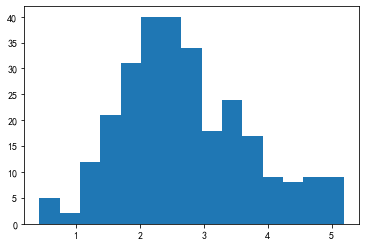

In [290]:
plt.hist(divorce_rate,bins=15)

In [295]:
len(df_sum4.columns)

15

In [305]:
cor_matrix

,Unnamed: 0,reg,Year,divorce_rate,regional_gdp,density,highedu,birth,House_Price,tertiary_gdp,raising_rate,sex_ratio,consume_increase,illteracy_rate,family_avg_num
0,0,北京市,18,3.427825,10.407469,7.034852,0.526800,0.824,10.529966,10.222234,1.337,0.9875,1.005679,1.693737,2.477914
1,1,天津市,18,4.111147,9.500239,8.520449,0.415000,0.667,9.675599,9.030295,1.303,1.1572,0.998424,1.385017,2.490174
2,2,上海市,18,2.438029,10.491602,8.248711,0.351700,0.720,10.274399,10.148246,1.308,1.0661,0.999118,2.376967,2.379654
3,3,重庆市,18,4.963452,9.979930,7.614028,0.308100,1.102,9.010666,9.338548,2.468,1.0035,1.010281,3.827026,2.869315
4,4,河北省,18,3.110862,10.388830,8.074137,0.245700,1.126,8.931515,9.695969,2.685,1.0167,1.007075,3.951175,3.103387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,243,陕西省,11,1.760000,9.434467,8.669227,0.337771,0.975,8.456441,8.379266,1.964,1.0542,1.016660,5.189165,3.077632
244,244,甘肃省,11,1.130000,8.521259,8.249052,0.204148,1.208,8.048802,7.582632,2.274,1.0818,1.016971,9.763330,3.200329
245,245,青海省,11,1.700000,7.420842,7.818832,0.108215,1.443,8.035931,6.291902,2.798,1.0261,1.007444,10.606846,3.352041
246,246,宁夏回族自治区,11,2.080000,7.650744,7.044905,0.191188,1.365,8.128425,6.759162,2.843,1.1107,1.021785,8.379630,3.183724


In [306]:
cor_matrix=df_sum4.dropna().iloc[:,3:]

In [307]:
cor_matrix

,divorce_rate,regional_gdp,density,highedu,birth,House_Price,tertiary_gdp,raising_rate,sex_ratio,consume_increase,illteracy_rate,family_avg_num
0,3.427825,10.407469,7.034852,0.526800,0.824,10.529966,10.222234,1.337,0.9875,1.005679,1.693737,2.477914
1,4.111147,9.500239,8.520449,0.415000,0.667,9.675599,9.030295,1.303,1.1572,0.998424,1.385017,2.490174
2,2.438029,10.491602,8.248711,0.351700,0.720,10.274399,10.148246,1.308,1.0661,0.999118,2.376967,2.379654
3,4.963452,9.979930,7.614028,0.308100,1.102,9.010666,9.338548,2.468,1.0035,1.010281,3.827026,2.869315
4,3.110862,10.388830,8.074137,0.245700,1.126,8.931515,9.695969,2.685,1.0167,1.007075,3.951175,3.103387
...,...,...,...,...,...,...,...,...,...,...,...,...
243,1.760000,9.434467,8.669227,0.337771,0.975,8.456441,8.379266,1.964,1.0542,1.016660,5.189165,3.077632
244,1.130000,8.521259,8.249052,0.204148,1.208,8.048802,7.582632,2.274,1.0818,1.016971,9.763330,3.200329
245,1.700000,7.420842,7.818832,0.108215,1.443,8.035931,6.291902,2.798,1.0261,1.007444,10.606846,3.352041
246,2.080000,7.650744,7.044905,0.191188,1.365,8.128425,6.759162,2.843,1.1107,1.021785,8.379630,3.183724


In [318]:
cor_matrix=df_sum4.iloc[:,3:]
cor_matrix=cor_matrix.dropna()

In [314]:
cor_col=cor_matrix.columns

In [319]:
r_matrix=pd.DataFrame()
p_matrix=pd.DataFrame()
import scipy.stats as stats
for i in cor_col:
    for j in cor_col:
        r_test=stats.pearsonr(cor_matrix[i],cor_matrix[j])
        r_matrix.loc[i,j]=r_test[0]
        p_matrix.loc[i,j]=r_test[1]


In [320]:
r_matrix

,divorce_rate,regional_gdp,density,highedu,birth,House_Price,tertiary_gdp,raising_rate,sex_ratio,consume_increase,illteracy_rate,family_avg_num
divorce_rate,1.000000,0.274620,0.036759,0.328510,-0.495305,0.126128,0.296008,-0.404760,-0.253209,0.029881,-0.424958,-0.497552
regional_gdp,0.274620,1.000000,0.128014,0.351890,-0.344234,0.352519,0.981995,-0.388048,0.017284,0.016679,-0.615551,-0.535784
density,0.036759,0.128014,1.000000,-0.035757,-0.069426,-0.071765,0.095939,0.022417,0.162553,-0.058993,-0.198208,0.088219
highedu,0.328510,0.351890,-0.035757,1.000000,-0.567268,0.664507,0.442076,-0.665923,-0.041830,0.009876,-0.416950,-0.597654
birth,-0.495305,-0.344234,-0.069426,-0.567268,1.000000,-0.294608,-0.371049,0.856802,0.147731,-0.037171,0.455103,0.719771
House_Price,0.126128,0.352519,-0.071765,0.664507,-0.294608,1.000000,0.486773,-0.511552,0.206647,0.042525,-0.262575,-0.532319
tertiary_gdp,0.296008,0.981995,0.095939,0.442076,-0.371049,0.486773,1.000000,-0.440881,0.032945,0.030775,-0.593470,-0.576643
raising_rate,-0.404760,-0.388048,0.022417,-0.665923,0.856802,-0.511552,-0.440881,1.000000,0.089546,0.002160,0.481025,0.834941
sex_ratio,-0.253209,0.017284,0.162553,-0.041830,0.147731,0.206647,0.032945,0.089546,1.000000,0.021508,-0.151558,0.039840
consume_increase,0.029881,0.016679,-0.058993,0.009876,-0.037171,0.042525,0.030775,0.002160,0.021508,1.000000,0.000373,0.008714


In [321]:
p_matrix

,divorce_rate,regional_gdp,density,highedu,birth,House_Price,tertiary_gdp,raising_rate,sex_ratio,consume_increase,illteracy_rate,family_avg_num
divorce_rate,0.000000e+00,1.146523e-05,0.564516,1.190645e-07,9.337350e-17,4.723754e-02,2.087723e-06,3.407873e-11,0.000055,0.639576,2.696328e-12,6.459974e-17
regional_gdp,1.146523e-05,0.000000e+00,0.044002,1.220665e-08,2.627345e-08,1.145134e-08,4.696183e-180,2.453375e-10,0.786519,0.793823,2.968348e-27,7.905656e-20
density,5.645162e-01,4.400158e-02,0.000000,5.751844e-01,2.761027e-01,2.602069e-01,1.318901e-01,7.253702e-01,0.010347,0.354895,1.708080e-03,1.660673e-01
highedu,1.190645e-07,1.220665e-08,0.575184,0.000000e+00,1.607773e-22,5.735845e-33,2.740894e-13,3.777327e-33,0.512021,0.877021,7.523731e-12,2.092404e-25
birth,9.337350e-17,2.627345e-08,0.276103,1.607773e-22,0.000000e+00,2.343963e-06,1.635337e-09,1.025612e-72,0.019938,0.560149,4.406359e-14,7.149096e-41
House_Price,4.723754e-02,1.145134e-08,0.260207,5.735845e-33,2.343963e-06,0.000000e+00,3.693347e-16,6.109842e-18,0.001063,0.505023,2.815957e-05,1.504061e-19
tertiary_gdp,2.087723e-06,4.696183e-180,0.131890,2.740894e-13,1.635337e-09,3.693347e-16,0.000000e+00,3.228356e-13,0.605616,0.629582,5.446660e-25,2.227263e-23
raising_rate,3.407873e-11,2.453375e-10,0.725370,3.777327e-33,1.025612e-72,6.109842e-18,3.228356e-13,0.000000e+00,0.159762,0.972995,9.128255e-16,9.522402e-66
sex_ratio,5.499636e-05,7.865190e-01,0.010347,5.120207e-01,1.993815e-02,1.063188e-03,6.056163e-01,1.597620e-01,0.000000,0.736094,1.691752e-02,5.323167e-01
consume_increase,6.395764e-01,7.938229e-01,0.354895,8.770209e-01,5.601487e-01,5.050233e-01,6.295821e-01,9.729955e-01,0.736094,0.000000,9.953369e-01,8.914006e-01


In [325]:
p_evident_index=pd.DataFrame()
for i in p_matrix.index:
    for j in p_matrix.columns:
        t=p_matrix.loc[i,j]
        if t<0.01:
            p_evident_index.loc[i,j]=2
        elif t<0.05:
            p_evident_index.loc[i,j]=1
        else:
            p_evident_index.loc[i,j]=0

In [326]:
p_evident_index

,divorce_rate,regional_gdp,density,highedu,birth,House_Price,tertiary_gdp,raising_rate,sex_ratio,consume_increase,illteracy_rate,family_avg_num
divorce_rate,2.0,2.0,0.0,2.0,2.0,1.0,2.0,2.0,2.0,0.0,2.0,2.0
regional_gdp,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,2.0,2.0
density,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0
highedu,2.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,2.0,2.0
birth,2.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0,1.0,0.0,2.0,2.0
House_Price,1.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,2.0,2.0
tertiary_gdp,2.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,2.0,2.0
raising_rate,2.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,2.0,2.0
sex_ratio,2.0,0.0,1.0,0.0,1.0,2.0,0.0,0.0,2.0,0.0,1.0,0.0
consume_increase,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0


In [332]:
r_matrix.to_excel('data_pre\coerr_matrix.xlsx',sheet_name='r_matrix')

In [334]:
factor_data=df_sum4.iloc[:,4:].dropna()

In [335]:
factor_data

,regional_gdp,density,highedu,birth,House_Price,tertiary_gdp,raising_rate,sex_ratio,consume_increase,illteracy_rate,family_avg_num
0,10.407469,7.034852,0.526800,0.824,10.529966,10.222234,1.337,0.9875,1.005679,1.693737,2.477914
1,9.500239,8.520449,0.415000,0.667,9.675599,9.030295,1.303,1.1572,0.998424,1.385017,2.490174
2,10.491602,8.248711,0.351700,0.720,10.274399,10.148246,1.308,1.0661,0.999118,2.376967,2.379654
3,9.979930,7.614028,0.308100,1.102,9.010666,9.338548,2.468,1.0035,1.010281,3.827026,2.869315
4,10.388830,8.074137,0.245700,1.126,8.931515,9.695969,2.685,1.0167,1.007075,3.951175,3.103387
...,...,...,...,...,...,...,...,...,...,...,...
336,8.897625,8.610319,0.287991,1.029,7.944847,7.900911,2.224,1.0279,1.011028,8.188123,3.168425
337,8.060483,8.243283,0.168684,1.322,7.523481,7.118186,2.899,1.0239,1.028508,17.776008,3.596755
338,6.926204,7.626083,0.103324,1.449,7.776535,5.874734,3.044,1.0161,1.032009,16.687931,3.635897
339,7.093338,6.783325,0.161025,1.431,7.703008,6.163315,3.239,1.0371,1.028336,10.077338,3.563589


In [337]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import math as math
from numpy import *
import numpy.linalg as nlg
from factor_analyzer import factor_analyzer,Rotator
from factor_analyzer import FactorAnalyzer, calculate_kmo, calculate_bartlett_sphericity  


In [339]:
kmo = calculate_kmo(factor_data) 

C:\Users\CAI\anaconda3\lib\site-packages\factor_analyzer\utils.py:248: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn('The inverse of the variance-covariance matrix '


In [342]:
# adequancy test
kmo[1]

0.7275414790054401

In [343]:
bartlett = calculate_bartlett_sphericity(factor_data)

In [345]:
bartlett[1]

0.0

In [349]:
len(factor_data.columns)

11

In [347]:
type(bartlett)

tuple

In [348]:
fa = FactorAnalyzer(11, rotation=None)
fa.fit(factor_data)

#特征根和特征向量
ev, v = fa.get_eigenvalues()

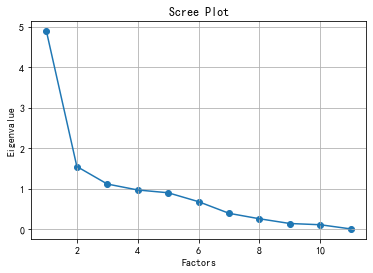

In [350]:
plt.scatter(range(1,factor_data.shape[1]+1),ev)
plt.plot(range(1,factor_data.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [351]:
fa = FactorAnalyzer(2, rotation="varimax")
fa.fit(factor_data)
fa.loadings_

array([[-0.50550144,  0.79663608],
       [ 0.0544171 ,  0.20680954],
       [-0.74549699,  0.04764519],
       [ 0.81324089,  0.09185922],
       [-0.54945632,  0.25778682],
       [-0.56634519,  0.80269876],
       [ 0.97368093,  0.11939415],
       [ 0.08998069,  0.24178261],
       [-0.04626589,  0.10095609],
       [ 0.54174298, -0.44306581],
       [ 0.87492255, -0.20853169]])

In [352]:
fa_trans=fa.transform(factor_data)

In [354]:
shape(fa_trans)

(310, 2)

In [356]:
factor_data

,regional_gdp,density,highedu,birth,House_Price,tertiary_gdp,raising_rate,sex_ratio,consume_increase,illteracy_rate,family_avg_num
0,10.407469,7.034852,0.526800,0.824,10.529966,10.222234,1.337,0.9875,1.005679,1.693737,2.477914
1,9.500239,8.520449,0.415000,0.667,9.675599,9.030295,1.303,1.1572,0.998424,1.385017,2.490174
2,10.491602,8.248711,0.351700,0.720,10.274399,10.148246,1.308,1.0661,0.999118,2.376967,2.379654
3,9.979930,7.614028,0.308100,1.102,9.010666,9.338548,2.468,1.0035,1.010281,3.827026,2.869315
4,10.388830,8.074137,0.245700,1.126,8.931515,9.695969,2.685,1.0167,1.007075,3.951175,3.103387
...,...,...,...,...,...,...,...,...,...,...,...
336,8.897625,8.610319,0.287991,1.029,7.944847,7.900911,2.224,1.0279,1.011028,8.188123,3.168425
337,8.060483,8.243283,0.168684,1.322,7.523481,7.118186,2.899,1.0239,1.028508,17.776008,3.596755
338,6.926204,7.626083,0.103324,1.449,7.776535,5.874734,3.044,1.0161,1.032009,16.687931,3.635897
339,7.093338,6.783325,0.161025,1.431,7.703008,6.163315,3.239,1.0371,1.028336,10.077338,3.563589


In [357]:
df_sum4

,Unnamed: 0,reg,Year,divorce_rate,regional_gdp,density,highedu,birth,House_Price,tertiary_gdp,raising_rate,sex_ratio,consume_increase,illteracy_rate,family_avg_num
0,0,北京市,18,3.427825,10.407469,7.034852,0.526800,0.824,10.529966,10.222234,1.337,0.9875,1.005679,1.693737,2.477914
1,1,天津市,18,4.111147,9.500239,8.520449,0.415000,0.667,9.675599,9.030295,1.303,1.1572,0.998424,1.385017,2.490174
2,2,上海市,18,2.438029,10.491602,8.248711,0.351700,0.720,10.274399,10.148246,1.308,1.0661,0.999118,2.376967,2.379654
3,3,重庆市,18,4.963452,9.979930,7.614028,0.308100,1.102,9.010666,9.338548,2.468,1.0035,1.010281,3.827026,2.869315
4,4,河北省,18,3.110862,10.388830,8.074137,0.245700,1.126,8.931515,9.695969,2.685,1.0167,1.007075,3.951175,3.103387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,336,陕西省,8,NaN,8.897625,8.610319,0.287991,1.029,7.944847,7.900911,2.224,1.0279,1.011028,8.188123,3.168425
337,337,甘肃省,8,NaN,8.060483,8.243283,0.168684,1.322,7.523481,7.118186,2.899,1.0239,1.028508,17.776008,3.596755
338,338,青海省,8,NaN,6.926204,7.626083,0.103324,1.449,7.776535,5.874734,3.044,1.0161,1.032009,16.687931,3.635897
339,339,宁夏回族自治区,8,NaN,7.093338,6.783325,0.161025,1.431,7.703008,6.163315,3.239,1.0371,1.028336,10.077338,3.563589


In [359]:
factor_data=df_sum4.drop('divorce_rate',axis=1)

In [374]:
factor_data=factor_data.dropna()

In [389]:
factor_data

,Unnamed: 0,reg,Year,regional_gdp,density,highedu,birth,House_Price,tertiary_gdp,raising_rate,sex_ratio,consume_increase,illteracy_rate,family_avg_num
0,0,北京市,18,10.407469,7.034852,0.526800,0.824,10.529966,10.222234,1.337,0.9875,1.005679,1.693737,2.477914
1,1,天津市,18,9.500239,8.520449,0.415000,0.667,9.675599,9.030295,1.303,1.1572,0.998424,1.385017,2.490174
2,2,上海市,18,10.491602,8.248711,0.351700,0.720,10.274399,10.148246,1.308,1.0661,0.999118,2.376967,2.379654
3,3,重庆市,18,9.979930,7.614028,0.308100,1.102,9.010666,9.338548,2.468,1.0035,1.010281,3.827026,2.869315
4,4,河北省,18,10.388830,8.074137,0.245700,1.126,8.931515,9.695969,2.685,1.0167,1.007075,3.951175,3.103387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,336,陕西省,8,8.897625,8.610319,0.287991,1.029,7.944847,7.900911,2.224,1.0279,1.011028,8.188123,3.168425
337,337,甘肃省,8,8.060483,8.243283,0.168684,1.322,7.523481,7.118186,2.899,1.0239,1.028508,17.776008,3.596755
338,338,青海省,8,6.926204,7.626083,0.103324,1.449,7.776535,5.874734,3.044,1.0161,1.032009,16.687931,3.635897
339,339,宁夏回族自治区,8,7.093338,6.783325,0.161025,1.431,7.703008,6.163315,3.239,1.0371,1.028336,10.077338,3.563589


In [390]:
kmotest=factor_data.iloc[:,4:]
kmo = calculate_kmo(kmotest)


C:\Users\CAI\anaconda3\lib\site-packages\factor_analyzer\utils.py:248: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn('The inverse of the variance-covariance matrix '


In [391]:
kmo[1]

0.7557093717652106

In [377]:
factor_data

,Unnamed: 0,reg,Year,regional_gdp,density,highedu,birth,House_Price,tertiary_gdp,raising_rate,sex_ratio,consume_increase,illteracy_rate,family_avg_num
0,0,北京市,18,10.407469,7.034852,0.526800,0.824,10.529966,10.222234,1.337,0.9875,1.005679,1.693737,2.477914
1,1,天津市,18,9.500239,8.520449,0.415000,0.667,9.675599,9.030295,1.303,1.1572,0.998424,1.385017,2.490174
2,2,上海市,18,10.491602,8.248711,0.351700,0.720,10.274399,10.148246,1.308,1.0661,0.999118,2.376967,2.379654
3,3,重庆市,18,9.979930,7.614028,0.308100,1.102,9.010666,9.338548,2.468,1.0035,1.010281,3.827026,2.869315
4,4,河北省,18,10.388830,8.074137,0.245700,1.126,8.931515,9.695969,2.685,1.0167,1.007075,3.951175,3.103387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,336,陕西省,8,8.897625,8.610319,0.287991,1.029,7.944847,7.900911,2.224,1.0279,1.011028,8.188123,3.168425
337,337,甘肃省,8,8.060483,8.243283,0.168684,1.322,7.523481,7.118186,2.899,1.0239,1.028508,17.776008,3.596755
338,338,青海省,8,6.926204,7.626083,0.103324,1.449,7.776535,5.874734,3.044,1.0161,1.032009,16.687931,3.635897
339,339,宁夏回族自治区,8,7.093338,6.783325,0.161025,1.431,7.703008,6.163315,3.239,1.0371,1.028336,10.077338,3.563589


In [392]:
bartlett = calculate_bartlett_sphericity(factor_data.iloc[:,4:])
bartlett[1]

0.0

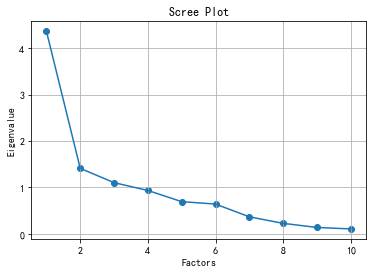

In [393]:
len(factor_data.iloc[:,4:].columns)
fa = FactorAnalyzer(11, rotation=None)
fa.fit(factor_data.iloc[:,4:])

#特征根和特征向量
ev, v = fa.get_eigenvalues()

plt.scatter(range(1,factor_data.iloc[:,4:].shape[1]+1),ev)
plt.plot(range(1,factor_data.iloc[:,4:].shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [394]:
fa = FactorAnalyzer(2, rotation="varimax")
fa.fit(factor_data.iloc[:,4:])
fa.loadings_

array([[ 0.02002048,  0.20701642],
       [-0.74555572,  0.04678519],
       [ 0.801834  ,  0.28037998],
       [-0.59369554,  0.33716378],
       [-0.64287096,  0.43500129],
       [ 0.93628805,  0.25109209],
       [ 0.05440533,  0.4666221 ],
       [-0.06148889,  0.12306766],
       [ 0.60585236, -0.35701365],
       [ 0.90081713, -0.09423187]])

In [395]:
fa_trans=fa.transform(factor_data.iloc[:,4:])
fa_trans

array([[-1.72123150e+00,  4.69877391e-01],
       [-1.62102727e+00,  6.74691454e-01],
       [-1.65725920e+00,  7.65784959e-01],
       [-9.44173849e-02,  5.96565435e-01],
       [ 2.78803844e-01,  8.88314436e-01],
       [-2.59710062e-01,  1.70603853e-01],
       [-7.67450675e-01, -5.19835909e-01],
       [-1.30310732e+00, -7.25861893e-01],
       [-9.21740241e-01, -6.54131159e-01],
       [-1.16048754e+00, -7.22407585e-01],
       [-7.47926745e-01,  4.55608304e-01],
       [-9.19808563e-01,  1.00027818e+00],
       [ 2.93182409e-01,  1.04651526e+00],
       [-3.13250647e-01,  1.09190888e+00],
       [ 6.47859575e-01,  1.19407804e+00],
       [ 1.39587438e-03,  1.07872028e+00],
       [ 7.87482965e-01,  1.34448868e+00],
       [-5.17418928e-01,  7.20000600e-01],
       [ 4.72121419e-01,  9.91039104e-01],
       [-5.78342845e-01,  2.18275117e+00],
       [ 9.48964897e-01,  1.52782449e+00],
       [ 7.48511640e-01,  6.92896091e-01],
       [-1.62236070e-01,  3.72576556e-01],
       [ 1.

In [396]:
fa.get_factor_variance()

(array([4.0268541 , 0.85883058]),
 array([0.40268541, 0.08588306]),
 array([0.40268541, 0.48856847]))

In [397]:
fa.get_communalities()

array([0.04325662, 0.55804218, 0.7215507 , 0.46615381, 0.60250919,
       0.93968256, 0.22069612, 0.01892653, 0.49451583, 0.82035115])

In [ ]:
print(fa.loadings_)

In [399]:
fa_load=pd.DataFrame(fa.loadings_)

fa_load.set_index(factor_data.iloc[:,4:].columns)

In [401]:
factor2_data=factor_data.iloc[:,4:]

In [403]:
factor2_data.drop(['density','sex_ratio','consume_increase'],axis=1,inplace=True)

In [404]:
factor2_data

,highedu,birth,House_Price,tertiary_gdp,raising_rate,illteracy_rate,family_avg_num
0,0.526800,0.824,10.529966,10.222234,1.337,1.693737,2.477914
1,0.415000,0.667,9.675599,9.030295,1.303,1.385017,2.490174
2,0.351700,0.720,10.274399,10.148246,1.308,2.376967,2.379654
3,0.308100,1.102,9.010666,9.338548,2.468,3.827026,2.869315
4,0.245700,1.126,8.931515,9.695969,2.685,3.951175,3.103387
...,...,...,...,...,...,...,...
336,0.287991,1.029,7.944847,7.900911,2.224,8.188123,3.168425
337,0.168684,1.322,7.523481,7.118186,2.899,17.776008,3.596755
338,0.103324,1.449,7.776535,5.874734,3.044,16.687931,3.635897
339,0.161025,1.431,7.703008,6.163315,3.239,10.077338,3.563589


In [405]:
kmo = calculate_kmo(factor2_data)
kmo[1]

0.8023751256411469

In [406]:
bartlett = calculate_bartlett_sphericity(factor2_data)
bartlett[1]

0.0

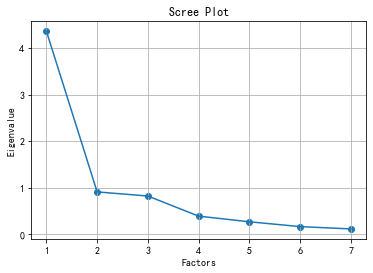

In [407]:
len(factor2_data.columns)
fa = FactorAnalyzer(7, rotation=None)
fa.fit(factor2_data)

#特征根和特征向量
ev, v = fa.get_eigenvalues()

plt.scatter(range(1,factor2_data.shape[1]+1),ev)
plt.plot(range(1,factor2_data.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [466]:
fa = FactorAnalyzer(2, rotation="varimax")
fa.fit(factor2_data)
fa.loadings_

array([[-0.5325394 ,  0.51941219],
       [ 0.85197901, -0.23154863],
       [-0.26898802,  0.62087724],
       [-0.18825958,  0.82134858],
       [ 0.90217606, -0.36385271],
       [ 0.33320694, -0.56416365],
       [ 0.63725726, -0.64125769]])

In [ ]:
fa_score = fa.transform(factor2_data)
print(fa_score)

In [409]:
fa.get_communalities()

array([0.55338724, 0.779483  , 0.4578431 , 0.71005517, 0.94631043,
       0.42930749, 0.81730825])

In [410]:
fa.get_factor_variance()

(array([2.44830799, 2.24538669]),
 array([0.34975828, 0.32076953]),
 array([0.34975828, 0.67052781]))

In [411]:
fa3 = FactorAnalyzer(3, rotation="varimax")
fa3.fit(factor2_data)
fa3.loadings_

array([[-0.52673812, -0.26089899,  0.51414477],
       [ 0.85850682,  0.2689312 , -0.07398317],
       [-0.17526342, -0.23784117,  0.95777413],
       [-0.18901808, -0.70855422,  0.35373529],
       [ 0.88725973,  0.26043555, -0.29728062],
       [ 0.29617262,  0.73943087, -0.09241968],
       [ 0.61678478,  0.57262331, -0.32562951]])

In [412]:
fa3.get_communalities()

array([0.60986618, 0.81483146, 1.00461696, 0.66290557, 0.94343228,
       0.64301763, 0.8143555 ])

In [413]:
fa3.get_factor_variance()

(array([2.33630362, 1.64149192, 1.51523003]),
 array([0.33375766, 0.23449885, 0.21646143]),
 array([0.33375766, 0.56825651, 0.78471794]))

In [424]:
fa2_load=pd.DataFrame(fa.loadings_)

fa2_load=fa2_load.set_index(factor2_data.columns)

In [422]:
fa4 = FactorAnalyzer(2, rotation="varimax")
fa4.fit(factor2_data)
fa4.loadings_

array([[-0.5325394 ,  0.51941219],
       [ 0.85197901, -0.23154863],
       [-0.26898802,  0.62087724],
       [-0.18825958,  0.82134858],
       [ 0.90217606, -0.36385271],
       [ 0.33320694, -0.56416365],
       [ 0.63725726, -0.64125769]])

In [425]:
fa2_load

,0,1
highedu,-0.532539,0.519412
birth,0.851979,-0.231549
House_Price,-0.268988,0.620877
tertiary_gdp,-0.188260,0.821349
raising_rate,0.902176,-0.363853
illteracy_rate,0.333207,-0.564164
family_avg_num,0.637257,-0.641258


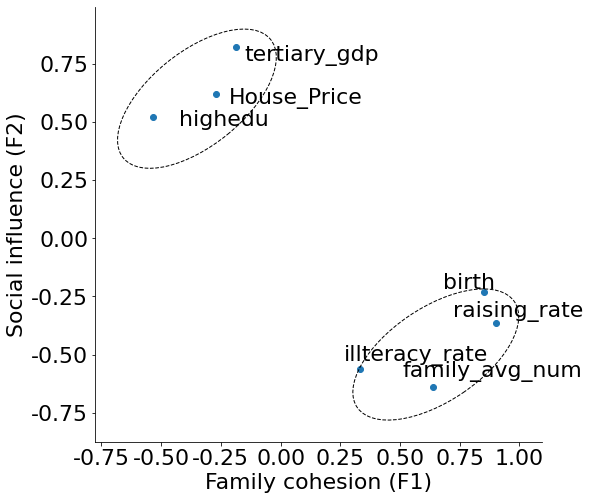

In [507]:
font = {'family' : 'DejaVu Sans',
        'weight' : 'regular',
        'size'   : 22}

matplotlib.rc('font', **font)
fig,ax=plt.subplots(figsize=(8,8))
plt.scatter(fa2_load[0],fa2_load[1])
for i in fa2_load.index:
    ax.annotate(i, (fa2_load.loc[i,0]*0.8, fa2_load.loc[i,1]*0.93),fontweight='regular')
matplotlib.rcParams.update({'font.size': 13})

ell1 = Ellipse(xy = (-0.35, 0.6), width = 0.8, height = 0.4, angle = 40.0, fill=False, linestyle='--')
ell2 = Ellipse(xy = (0.65, -0.5), width = 0.8, height = 0.4, angle = 35.0, fill=False, linestyle='--')

ax.add_patch(ell1)
ax.add_patch(ell2)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# 给x轴加描述
plt.xlabel("Family cohesion (F1)")
# 给y轴加描述
plt.ylabel("Social influence (F2)")

plt.savefig("factor_score.png")
plt.show()

In [452]:
from matplotlib.patches import Ellipse, Circle

In [472]:
factor_data

,Unnamed: 0,reg,Year,regional_gdp,density,highedu,birth,House_Price,tertiary_gdp,raising_rate,sex_ratio,consume_increase,illteracy_rate,family_avg_num
0,0,北京市,18,10.407469,7.034852,0.526800,0.824,10.529966,10.222234,1.337,0.9875,1.005679,1.693737,2.477914
1,1,天津市,18,9.500239,8.520449,0.415000,0.667,9.675599,9.030295,1.303,1.1572,0.998424,1.385017,2.490174
2,2,上海市,18,10.491602,8.248711,0.351700,0.720,10.274399,10.148246,1.308,1.0661,0.999118,2.376967,2.379654
3,3,重庆市,18,9.979930,7.614028,0.308100,1.102,9.010666,9.338548,2.468,1.0035,1.010281,3.827026,2.869315
4,4,河北省,18,10.388830,8.074137,0.245700,1.126,8.931515,9.695969,2.685,1.0167,1.007075,3.951175,3.103387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,336,陕西省,8,8.897625,8.610319,0.287991,1.029,7.944847,7.900911,2.224,1.0279,1.011028,8.188123,3.168425
337,337,甘肃省,8,8.060483,8.243283,0.168684,1.322,7.523481,7.118186,2.899,1.0239,1.028508,17.776008,3.596755
338,338,青海省,8,6.926204,7.626083,0.103324,1.449,7.776535,5.874734,3.044,1.0161,1.032009,16.687931,3.635897
339,339,宁夏回族自治区,8,7.093338,6.783325,0.161025,1.431,7.703008,6.163315,3.239,1.0371,1.028336,10.077338,3.563589


In [488]:
fa_score=pd.DataFrame(fa_score)

In [494]:
fa_score['reg']=factor_data.reg.tolist()

In [495]:
fa_score['Year']=factor_data.Year.tolist()

In [497]:
fa_score.Year.unique()

array([18, 17, 16, 15, 14, 13, 12, 11,  9,  8], dtype=int64)

In [498]:
fa_score

,0,1,reg,Year
0,-0.865831,1.861989,北京市,18
1,-1.509036,0.584042,天津市,18
2,-1.170266,1.287237,上海市,18
3,0.444914,0.818915,重庆市,18
4,0.763240,0.675368,河北省,18
...,...,...,...,...
305,-0.441204,-0.738151,陕西省,8
306,0.451020,-1.546806,甘肃省,8
307,0.460978,-2.222137,青海省,8
308,0.815163,-1.722700,宁夏回族自治区,8


In [493]:
factor_data.Year

0      18
1      18
2      18
3      18
4      18
       ..
336     8
337     8
338     8
339     8
340     8
Name: Year, Length: 310, dtype: int64

In [503]:
fa_score.Year.unique()

array([18, 17, 16, 15, 14, 13, 12, 11,  9,  8], dtype=int64)

In [504]:
df_sum5=pd.merge(df_sum4,fa_score,on=["reg","Year"],how="outer")

In [505]:
df_sum5

,Unnamed: 0,reg,Year,divorce_rate,regional_gdp,density,highedu,birth,House_Price,tertiary_gdp,raising_rate,sex_ratio,consume_increase,illteracy_rate,family_avg_num,0,1
0,0,北京市,18,3.427825,10.407469,7.034852,0.526800,0.824,10.529966,10.222234,1.337,0.9875,1.005679,1.693737,2.477914,-0.865831,1.861989
1,1,天津市,18,4.111147,9.500239,8.520449,0.415000,0.667,9.675599,9.030295,1.303,1.1572,0.998424,1.385017,2.490174,-1.509036,0.584042
2,2,上海市,18,2.438029,10.491602,8.248711,0.351700,0.720,10.274399,10.148246,1.308,1.0661,0.999118,2.376967,2.379654,-1.170266,1.287237
3,3,重庆市,18,4.963452,9.979930,7.614028,0.308100,1.102,9.010666,9.338548,2.468,1.0035,1.010281,3.827026,2.869315,0.444914,0.818915
4,4,河北省,18,3.110862,10.388830,8.074137,0.245700,1.126,8.931515,9.695969,2.685,1.0167,1.007075,3.951175,3.103387,0.763240,0.675368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,336,陕西省,8,NaN,8.897625,8.610319,0.287991,1.029,7.944847,7.900911,2.224,1.0279,1.011028,8.188123,3.168425,-0.441204,-0.738151
337,337,甘肃省,8,NaN,8.060483,8.243283,0.168684,1.322,7.523481,7.118186,2.899,1.0239,1.028508,17.776008,3.596755,0.451020,-1.546806
338,338,青海省,8,NaN,6.926204,7.626083,0.103324,1.449,7.776535,5.874734,3.044,1.0161,1.032009,16.687931,3.635897,0.460978,-2.222137
339,339,宁夏回族自治区,8,NaN,7.093338,6.783325,0.161025,1.431,7.703008,6.163315,3.239,1.0371,1.028336,10.077338,3.563589,0.815163,-1.722700


In [506]:
df_sum5.Year.unique()

array([18, 17, 16, 15, 14, 13, 12, 11, 10,  9,  8], dtype=int64)

In [513]:
df_sum5.rename(columns={0:'Family cohesion', 1:'Social influence'}, inplace = True)

In [514]:
df_sum5

,Unnamed: 0,reg,Year,divorce_rate,regional_gdp,density,highedu,birth,House_Price,tertiary_gdp,raising_rate,sex_ratio,consume_increase,illteracy_rate,family_avg_num,Family cohesion,Social influence
0,0,北京市,18,3.427825,10.407469,7.034852,0.526800,0.824,10.529966,10.222234,1.337,0.9875,1.005679,1.693737,2.477914,-0.865831,1.861989
1,1,天津市,18,4.111147,9.500239,8.520449,0.415000,0.667,9.675599,9.030295,1.303,1.1572,0.998424,1.385017,2.490174,-1.509036,0.584042
2,2,上海市,18,2.438029,10.491602,8.248711,0.351700,0.720,10.274399,10.148246,1.308,1.0661,0.999118,2.376967,2.379654,-1.170266,1.287237
3,3,重庆市,18,4.963452,9.979930,7.614028,0.308100,1.102,9.010666,9.338548,2.468,1.0035,1.010281,3.827026,2.869315,0.444914,0.818915
4,4,河北省,18,3.110862,10.388830,8.074137,0.245700,1.126,8.931515,9.695969,2.685,1.0167,1.007075,3.951175,3.103387,0.763240,0.675368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,336,陕西省,8,NaN,8.897625,8.610319,0.287991,1.029,7.944847,7.900911,2.224,1.0279,1.011028,8.188123,3.168425,-0.441204,-0.738151
337,337,甘肃省,8,NaN,8.060483,8.243283,0.168684,1.322,7.523481,7.118186,2.899,1.0239,1.028508,17.776008,3.596755,0.451020,-1.546806
338,338,青海省,8,NaN,6.926204,7.626083,0.103324,1.449,7.776535,5.874734,3.044,1.0161,1.032009,16.687931,3.635897,0.460978,-2.222137
339,339,宁夏回族自治区,8,NaN,7.093338,6.783325,0.161025,1.431,7.703008,6.163315,3.239,1.0371,1.028336,10.077338,3.563589,0.815163,-1.722700


In [515]:
reg_data=df_sum5[['reg','Year','divorce_rate','Family cohesion','Social influence']]

In [520]:
reg_data.to_excel('data_pre\Reg_data.xlsx',sheet_name='reg')

In [521]:
reg_data

,reg,Year,divorce_rate,Family cohesion,Social influence
0,北京市,18,3.427825,-0.865831,1.861989
1,天津市,18,4.111147,-1.509036,0.584042
2,上海市,18,2.438029,-1.170266,1.287237
3,重庆市,18,4.963452,0.444914,0.818915
4,河北省,18,3.110862,0.763240,0.675368
...,...,...,...,...,...
336,陕西省,8,NaN,-0.441204,-0.738151
337,甘肃省,8,NaN,0.451020,-1.546806
338,青海省,8,NaN,0.460978,-2.222137
339,宁夏回族自治区,8,NaN,0.815163,-1.722700


In [522]:
reg2_data=reg_data.dropna()

In [523]:
reg2_data

,reg,Year,divorce_rate,Family cohesion,Social influence
0,北京市,18,3.427825,-0.865831,1.861989
1,天津市,18,4.111147,-1.509036,0.584042
2,上海市,18,2.438029,-1.170266,1.287237
3,重庆市,18,4.963452,0.444914,0.818915
4,河北省,18,3.110862,0.763240,0.675368
...,...,...,...,...,...
243,陕西省,11,1.760000,-0.661529,-0.296355
244,甘肃省,11,1.130000,-0.316495,-0.981746
245,青海省,11,1.700000,0.263838,-1.685240
246,宁夏回族自治区,11,2.080000,0.445850,-1.032706


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [534]:
y = reg2_data.iloc[:, 2] 
x = reg2_data.iloc[:, 3:5] 

In [535]:
y = y[:, np.newaxis]

In [536]:
shape(y)

(248, 1)

In [537]:
Linear_simple_model = LinearRegression()

In [538]:
Linear_simple_model.fit(x, y)

LinearRegression()

In [539]:
coef = Linear_simple_model.coef_

In [540]:
coef

array([[-0.37999875,  0.30607331]])

In [541]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn import linear_model

In [542]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=20)

In [543]:
Linear_simple_model2 = LinearRegression()
Linear_simple_model2.fit(X_train, y_train)

LinearRegression()

In [544]:
Linear_simple_model2.score(X_test, y_test)

0.1996893021890047

In [545]:
y_pred=Linear_simple_model2.predict(X_test)
from sklearn import metrics
#用scikit-learn计算MSE
mse=metrics.mean_squared_error(y_test,y_pred)
print('MES',mse)
#计算RMSE
rmse=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print('RMSE',rmse)

MES 0.7948310152007134
RMSE 0.8915329580002712


In [547]:
1- mean_squared_error(y_test,y_pred)/ np.var(y_test)

NameError: name 'mean_squared_error' is not defined

In [548]:
from sklearn.metrics import mean_squared_error #均方误差
from sklearn.metrics import mean_absolute_error #平方绝对误差
from sklearn.metrics import r2_score#R square

In [550]:
mean_squared_error(y_test,y_pred)

0.7948310152007134

In [553]:
mean_absolute_error(y_test,y_pred)#MAE(平均绝对误差)

0.6978671594794181

In [554]:
r2_score(y_test,y_pred)

0.1996893021890047

In [555]:
y1_pred=Linear_simple_model.predict(x)
r2_score(y,y1_pred)

0.21791869571852673

In [556]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [559]:
y = reg2_data.iloc[:, 2] 
x = reg2_data.iloc[:, [3,4]] 
x = sm.add_constant(x) # 若模型中有截距，必须有这一步
model = sm.OLS(y, x).fit() # 构建最小二乘模型并拟合
print(model.summary()) # 输出回归结果

                            OLS Regression Results                            
Dep. Variable:           divorce_rate   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     34.13
Date:                Thu, 17 Dec 2020   Prob (F-statistic):           8.38e-14
Time:                        00:45:55   Log-Likelihood:                -318.45
No. Observations:                 248   AIC:                             642.9
Df Residuals:                     245   BIC:                             653.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                2.7387      0.057  

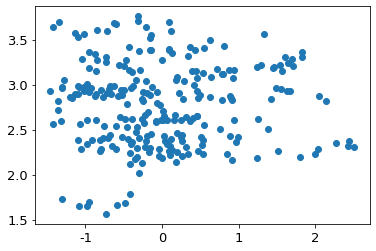

In [563]:
plt.scatter(model.resid,model.predict(x))

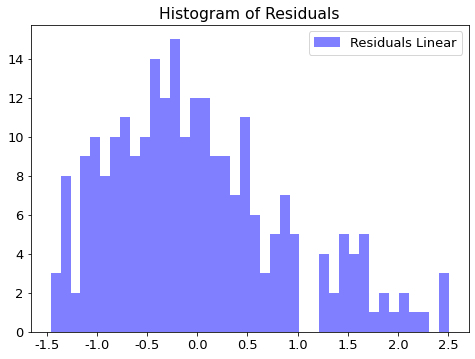

In [564]:
f, ax = plt.subplots(figsize=(7, 5))
f.tight_layout()
ax.hist(model.resid,bins=40, label='Residuals Linear', color='b', alpha=.5);
ax.set_title("Histogram of Residuals")
ax.legend(loc='best');

In [565]:
np.mean(model.resid)

8.040163517043473e-16

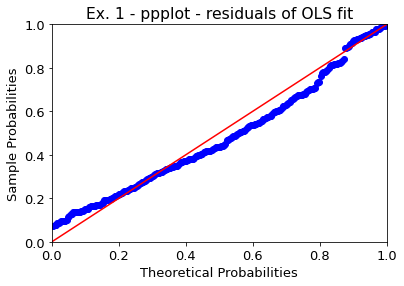

In [570]:
import statsmodels.api as sm
from matplotlib import pyplot as plt
res = model.resid # residuals
pplot = sm.ProbPlot(res)
fig = pplot.ppplot(line="45")
h = plt.title("Ex. 1 - ppplot - residuals of OLS fit")
plt.show()

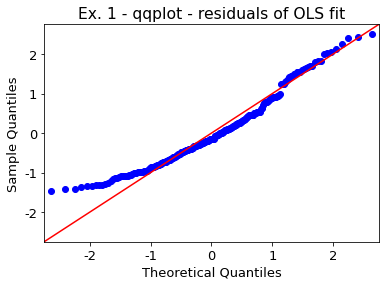

In [571]:
import statsmodels.api as sm
from matplotlib import pyplot as plt
res = model.resid # residuals
qqlot = sm.ProbPlot(res)
fig = pplot.qqplot(line="45")
h = plt.title("Ex. 1 - qqplot - residuals of OLS fit")
plt.show()

In [557]:
reg2_data

,reg,Year,divorce_rate,Family cohesion,Social influence
0,北京市,18,3.427825,-0.865831,1.861989
1,天津市,18,4.111147,-1.509036,0.584042
2,上海市,18,2.438029,-1.170266,1.287237
3,重庆市,18,4.963452,0.444914,0.818915
4,河北省,18,3.110862,0.763240,0.675368
...,...,...,...,...,...
243,陕西省,11,1.760000,-0.661529,-0.296355
244,甘肃省,11,1.130000,-0.316495,-0.981746
245,青海省,11,1.700000,0.263838,-1.685240
246,宁夏回族自治区,11,2.080000,0.445850,-1.032706


In [572]:
test_stat = kstest(res, 'norm')
p_value=test_stat[1]

In [573]:
p_value

0.061523188195986234

In [574]:
reg2_data

,reg,Year,divorce_rate,Family cohesion,Social influence
0,北京市,18,3.427825,-0.865831,1.861989
1,天津市,18,4.111147,-1.509036,0.584042
2,上海市,18,2.438029,-1.170266,1.287237
3,重庆市,18,4.963452,0.444914,0.818915
4,河北省,18,3.110862,0.763240,0.675368
...,...,...,...,...,...
243,陕西省,11,1.760000,-0.661529,-0.296355
244,甘肃省,11,1.130000,-0.316495,-0.981746
245,青海省,11,1.700000,0.263838,-1.685240
246,宁夏回族自治区,11,2.080000,0.445850,-1.032706


In [587]:
reg_T_data=reg2_data.copy()
reg_T_data['Year']=(reg_T_data['Year']-10)*0.1

In [588]:
reg_T_data['Family cohesion x Year']=reg_T_data['Family cohesion']*reg_T_data['Year']

In [589]:
reg_T_data['Social influence x Year']=reg_T_data['Social influence']*reg_T_data['Year']

In [590]:
reg_T_data

,reg,Year,divorce_rate,Family cohesion,Social influence,Family cohesion x Year,Social influence x Year
0,北京市,0.8,3.427825,-0.865831,1.861989,-0.692665,1.489591
1,天津市,0.8,4.111147,-1.509036,0.584042,-1.207229,0.467233
2,上海市,0.8,2.438029,-1.170266,1.287237,-0.936213,1.029790
3,重庆市,0.8,4.963452,0.444914,0.818915,0.355931,0.655132
4,河北省,0.8,3.110862,0.763240,0.675368,0.610592,0.540295
...,...,...,...,...,...,...,...
243,陕西省,0.1,1.760000,-0.661529,-0.296355,-0.066153,-0.029636
244,甘肃省,0.1,1.130000,-0.316495,-0.981746,-0.031650,-0.098175
245,青海省,0.1,1.700000,0.263838,-1.685240,0.026384,-0.168524
246,宁夏回族自治区,0.1,2.080000,0.445850,-1.032706,0.044585,-0.103271


In [591]:
y = reg_T_data.iloc[:, 2] 
x = reg_T_data.iloc[:, [1,3,4,5,6]] 
x = sm.add_constant(x) # 若模型中有截距，必须有这一步
model_T_S = sm.OLS(y, x).fit() # 构建最小二乘模型并拟合
print(model_T_S.summary()) # 输出回归结果

                            OLS Regression Results                            
Dep. Variable:           divorce_rate   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     24.66
Date:                Thu, 17 Dec 2020   Prob (F-statistic):           4.65e-20
Time:                        01:49:26   Log-Likelihood:                -297.86
No. Observations:                 248   AIC:                             607.7
Df Residuals:                     242   BIC:                             628.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [593]:
y = reg_T_data.iloc[:, 2] 
x = reg_T_data.iloc[:, [1,3,4]]
x = sm.add_constant(x) # 若模型中有截距，必须有这一步
model_T_S2 = sm.OLS(y, x).fit() # 构建最小二乘模型并拟合
print(model_T_S2.summary()) # 输出回归结果

                            OLS Regression Results                            
Dep. Variable:           divorce_rate   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     41.43
Date:                Thu, 17 Dec 2020   Prob (F-statistic):           1.13e-21
Time:                        01:51:46   Log-Likelihood:                -297.89
No. Observations:                 248   AIC:                             603.8
Df Residuals:                     244   BIC:                             617.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                2.0547      0.116  

In [597]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

model_T_S2_S = LinearRegression()

# Build step forward feature selection
sfs1 = sfs(model_T_S2_S,k_features = 5,forward=True,floating=False, scoring='r2',cv=5)

# Perform SFFS
sfs1 = sfs1.fit(reg_T_data.iloc[:, [1,3,4,5,6]], reg_T_data.iloc[:, 2])

In [599]:
sfs1.subsets_

{1: {'feature_idx': (0,),
  'cv_scores': array([-0.05796258, -0.05603936, -0.0130321 , -0.05998167, -0.13114323]),
  'avg_score': -0.06363178790414041,
  'feature_names': ('Year',)},
 2: {'feature_idx': (0, 1),
  'cv_scores': array([0.16938914, 0.22568139, 0.32143207, 0.09164248, 0.17477329]),
  'avg_score': 0.19658367348169628,
  'feature_names': ('Year', 'Family cohesion')},
 3: {'feature_idx': (0, 1, 2),
  'cv_scores': array([0.16636684, 0.28121024, 0.32173702, 0.09562895, 0.22726371]),
  'avg_score': 0.218441350204274,
  'feature_names': ('Year', 'Family cohesion', 'Social influence')},
 4: {'feature_idx': (0, 1, 2, 3),
  'cv_scores': array([0.16203914, 0.27784585, 0.32194079, 0.09292411, 0.22721238]),
  'avg_score': 0.21639245401833235,
  'feature_names': ('Year',
   'Family cohesion',
   'Social influence',
   'Family cohesion x Year')},
 5: {'feature_idx': (0, 1, 2, 3, 4),
  'cv_scores': array([0.13577538, 0.26737061, 0.32048149, 0.08705568, 0.19667503]),
  'avg_score': 0.201471

In [600]:
sfs1

SequentialFeatureSelector(estimator=LinearRegression(), k_features=5,
                          scoring='r2')

In [601]:
sfs1.k_feature_names_

('Year',
 'Family cohesion',
 'Social influence',
 'Family cohesion x Year',
 'Social influence x Year')

#### sfs1.k_feature_idx_

In [603]:
y = reg_T_data.iloc[:, 2] 
x = reg_T_data.iloc[:, [1,3,4]]
x = sm.add_constant(x) # 若模型中有截距，必须有这一步
model_T_S2 = sm.OLS(y, x).fit() # 构建最小二乘模型并拟合
print(model_T_S2.summary()) # 输出回归结果

                            OLS Regression Results                            
Dep. Variable:           divorce_rate   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     41.43
Date:                Thu, 17 Dec 2020   Prob (F-statistic):           1.13e-21
Time:                        02:20:42   Log-Likelihood:                -297.89
No. Observations:                 248   AIC:                             603.8
Df Residuals:                     244   BIC:                             617.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                2.0547      0.116  

In [ ]:
r_matrix2=pd.DataFrame()
p_matrix2=pd.DataFrame()
import scipy.stats as stats
for i in cor_col:
    for j in cor_col:
        r_test=stats.pearsonr(cor_matrix[i],cor_matrix[j])
        r_matrix.loc[i,j]=r_test[0]
        p_matrix.loc[i,j]=r_test[1]

TypeError: getsizeof() missing required argument 'object' (pos 1)

In [607]:
import psutil
mem = psutil.virtual_memory()
total = str(round(mem.total / 1024 / 1024))
#round方法进行四舍五入，然后转换成字符串 字节/1024得到kb 再/1024得到M
used = str(round(mem.used / 1024 / 1024))
use_per = str(round(mem.percent))
free = str(round(mem.free / 1024 / 1024))
print("您当前的内存大小为:" + total + "M")
print("已使用:" + used + "M(" + use_per + "%)")
print("可用内存:" + free + "M")

您当前的内存大小为:8083M
已使用:6438M(80%)
可用内存:1646M


In [632]:
x2 = reg_T_data.iloc[:, [1,2,3,4,5,6]]

In [633]:
r_matrix2=pd.DataFrame()
p_matrix2=pd.DataFrame()
import scipy.stats as stats
for i in x2.columns:
    for j in x2.columns:
        r_test2=stats.pearsonr(x2[i],x2[j])
        r_matrix2.loc[i,j]=r_test2[0]
        p_matrix2.loc[i,j]=r_test2[1]

In [634]:
r_matrix2

,Year,divorce_rate,Family cohesion,Social influence,Family cohesion x Year,Social influence x Year
Year,1.000000,0.335786,0.155118,0.256840,0.150658,0.311880
divorce_rate,0.335786,1.000000,-0.393897,0.290330,-0.338537,0.260819
Family cohesion,0.155118,-0.393897,1.000000,-0.104530,0.897186,-0.035878
Social influence,0.256840,0.290330,-0.104530,1.000000,-0.045795,0.893556
Family cohesion x Year,0.150658,-0.338537,0.897186,-0.045795,1.000000,-0.010104
Social influence x Year,0.311880,0.260819,-0.035878,0.893556,-0.010104,1.000000


In [635]:
p_matrix2

,Year,divorce_rate,Family cohesion,Social influence,Family cohesion x Year,Social influence x Year
Year,0.000000e+00,5.979237e-08,1.447385e-02,4.255260e-05,1.758945e-02,5.379632e-07
divorce_rate,5.979237e-08,0.000000e+00,1.245061e-10,3.326565e-06,4.587102e-08,3.198656e-05
Family cohesion,1.447385e-02,1.245061e-10,0.000000e+00,1.005212e-01,2.770124e-89,5.738908e-01
Social influence,4.255260e-05,3.326565e-06,1.005212e-01,0.000000e+00,4.728138e-01,1.568136e-87
Family cohesion x Year,1.758945e-02,4.587102e-08,2.770124e-89,4.728138e-01,0.000000e+00,8.742045e-01
Social influence x Year,5.379632e-07,3.198656e-05,5.738908e-01,1.568136e-87,8.742045e-01,0.000000e+00


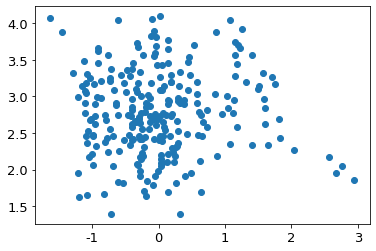

In [612]:
plt.scatter(model_T_S2.resid,model_T_S2.predict(x))

In [613]:
np.mean(model_T_S2.resid)

-1.9697505275607617e-17

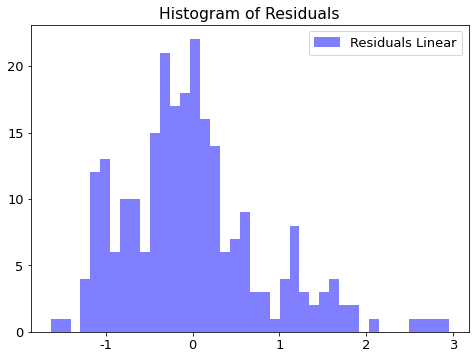

In [614]:
f, ax = plt.subplots(figsize=(7, 5))
f.tight_layout()
ax.hist(model_T_S2.resid,bins=40, label='Residuals Linear', color='b', alpha=.5);
ax.set_title("Histogram of Residuals")
ax.legend(loc='best');

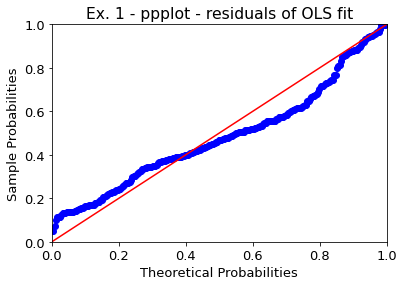

In [615]:
import statsmodels.api as sm
from matplotlib import pyplot as plt
res = model_T_S2.resid # residuals
pplot = sm.ProbPlot(res)
fig = pplot.ppplot(line="45")
h = plt.title("Ex. 1 - ppplot - residuals of OLS fit")
plt.show()

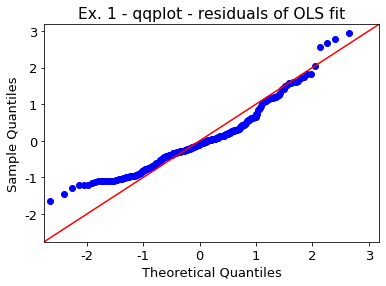

In [616]:
import statsmodels.api as sm
from matplotlib import pyplot as plt
res = model_T_S2.resid # residuals
qqlot = sm.ProbPlot(res)
fig = pplot.qqplot(line="45")
h = plt.title("Ex. 1 - qqplot - residuals of OLS fit")
plt.show()

In [617]:
test_stat2 = kstest(res, 'norm')
p_value2=test_stat2[1]
p_value2

0.00022535271137407372

In [618]:
reg_T_data

,reg,Year,divorce_rate,Family cohesion,Social influence,Family cohesion x Year,Social influence x Year
0,北京市,0.8,3.427825,-0.865831,1.861989,-0.692665,1.489591
1,天津市,0.8,4.111147,-1.509036,0.584042,-1.207229,0.467233
2,上海市,0.8,2.438029,-1.170266,1.287237,-0.936213,1.029790
3,重庆市,0.8,4.963452,0.444914,0.818915,0.355931,0.655132
4,河北省,0.8,3.110862,0.763240,0.675368,0.610592,0.540295
...,...,...,...,...,...,...,...
243,陕西省,0.1,1.760000,-0.661529,-0.296355,-0.066153,-0.029636
244,甘肃省,0.1,1.130000,-0.316495,-0.981746,-0.031650,-0.098175
245,青海省,0.1,1.700000,0.263838,-1.685240,0.026384,-0.168524
246,宁夏回族自治区,0.1,2.080000,0.445850,-1.032706,0.044585,-0.103271


In [621]:
t_reg_T_data=reg_T_data.copy()

In [622]:
t_reg_T_data["divorce_rate"] = t_reg_T_data["divorce_rate"].apply(np.log)

In [623]:
y = t_reg_T_data.iloc[:, 2] 
x = t_reg_T_data.iloc[:, [1,3,4]]
x = sm.add_constant(x) # 若模型中有截距，必须有这一步
model_T_S2t = sm.OLS(y, x).fit() # 构建最小二乘模型并拟合
print(model_T_S2t.summary()) # 输出回归结果

                            OLS Regression Results                            
Dep. Variable:           divorce_rate   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                     52.37
Date:                Thu, 17 Dec 2020   Prob (F-statistic):           3.61e-26
Time:                        10:31:46   Log-Likelihood:                -59.510
No. Observations:                 248   AIC:                             127.0
Df Residuals:                     244   BIC:                             141.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.6728      0.044  

In [628]:
x2 = t_reg_T_data.iloc[:, [1,2,3,4,5,6]]

In [629]:
r_matrix2t=pd.DataFrame()
p_matrix2t=pd.DataFrame()
import scipy.stats as stats
for i in x2.columns:
    for j in x2.columns:
        r_test2=stats.pearsonr(x2[i],x2[j])
        r_matrix2t.loc[i,j]=r_test2[0]
        p_matrix2t.loc[i,j]=r_test2[1]

In [630]:
r_matrix2t

,Year,divorce_rate,Family cohesion,Social influence,Family cohesion x Year,Social influence x Year
Year,1.000000,0.350935,0.155118,0.256840,0.150658,0.311880
divorce_rate,0.350935,1.000000,-0.372695,0.426241,-0.291106,0.349259
Family cohesion,0.155118,-0.372695,1.000000,-0.104530,0.897186,-0.035878
Social influence,0.256840,0.426241,-0.104530,1.000000,-0.045795,0.893556
Family cohesion x Year,0.150658,-0.291106,0.897186,-0.045795,1.000000,-0.010104
Social influence x Year,0.311880,0.349259,-0.035878,0.893556,-0.010104,1.000000


In [631]:
p_matrix2t

,Year,divorce_rate,Family cohesion,Social influence,Family cohesion x Year,Social influence x Year
Year,0.000000e+00,1.344597e-08,1.447385e-02,4.255260e-05,1.758945e-02,5.379632e-07
divorce_rate,1.344597e-08,0.000000e+00,1.367447e-09,2.281644e-12,3.123120e-06,1.592279e-08
Family cohesion,1.447385e-02,1.367447e-09,0.000000e+00,1.005212e-01,2.770124e-89,5.738908e-01
Social influence,4.255260e-05,2.281644e-12,1.005212e-01,0.000000e+00,4.728138e-01,1.568136e-87
Family cohesion x Year,1.758945e-02,3.123120e-06,2.770124e-89,4.728138e-01,0.000000e+00,8.742045e-01
Social influence x Year,5.379632e-07,1.592279e-08,5.738908e-01,1.568136e-87,8.742045e-01,0.000000e+00


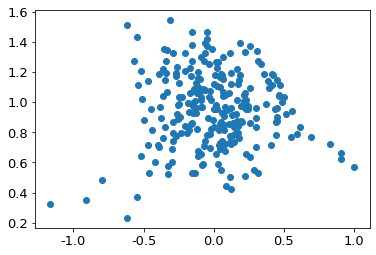

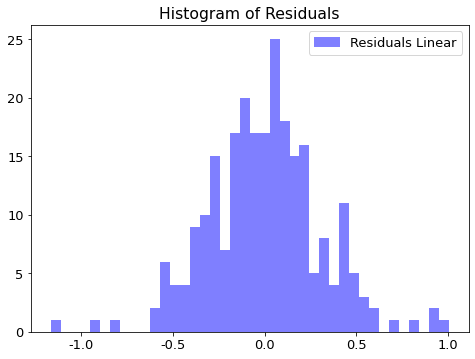

In [636]:
plt.scatter(model_T_S2t.resid,model_T_S2t.predict(x))
np.mean(model_T_S2t.resid)
f, ax = plt.subplots(figsize=(7, 5))
f.tight_layout()
ax.hist(model_T_S2t.resid,bins=40, label='Residuals Linear', color='b', alpha=.5);
ax.set_title("Histogram of Residuals")
ax.legend(loc='best');

In [637]:
np.mean(model_T_S2t.resid)

2.238352872228138e-17

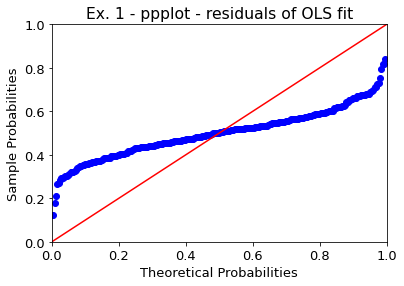

In [638]:

import statsmodels.api as sm
from matplotlib import pyplot as plt
res = model_T_S2t.resid # residuals
pplot = sm.ProbPlot(res)
fig = pplot.ppplot(line="45")
h = plt.title("Ex. 1 - ppplot - residuals of OLS fit")
plt.show()

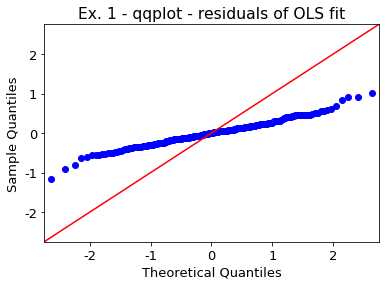

In [639]:
import statsmodels.api as sm
from matplotlib import pyplot as plt
res = model_T_S2t.resid # residuals
qqlot = sm.ProbPlot(res)
fig = pplot.qqplot(line="45")
h = plt.title("Ex. 1 - qqplot - residuals of OLS fit")
plt.show()

In [640]:
test_stat2 = kstest(res, 'norm')
p_value2=test_stat2[1]
p_value2

1.567089684257381e-16

In [641]:
reg_data

,reg,Year,divorce_rate,Family cohesion,Social influence
0,北京市,18,3.427825,-0.865831,1.861989
1,天津市,18,4.111147,-1.509036,0.584042
2,上海市,18,2.438029,-1.170266,1.287237
3,重庆市,18,4.963452,0.444914,0.818915
4,河北省,18,3.110862,0.763240,0.675368
...,...,...,...,...,...
336,陕西省,8,NaN,-0.441204,-0.738151
337,甘肃省,8,NaN,0.451020,-1.546806
338,青海省,8,NaN,0.460978,-2.222137
339,宁夏回族自治区,8,NaN,0.815163,-1.722700


In [650]:
reg_divorce_rate=reg_data[['reg','Year','divorce_rate']]
reg_divorce_rate=reg_divorce_rate.dropna()
#reg_divorce_rate=reg_divorce_rate.pivot(index='reg',columns='Year',values='divorce_rate')
reg_divorce_rate.to_excel('data_pre\THReg_divorce_rate.xlsx')

reg_divorce_rate

,reg,Year,divorce_rate
0,北京市,18,3.427825
1,天津市,18,4.111147
2,上海市,18,2.438029
3,重庆市,18,4.963452
4,河北省,18,3.110862
...,...,...,...
274,陕西省,10,1.715382
275,甘肃省,10,1.094843
276,青海省,10,1.427590
277,宁夏回族自治区,10,1.907548


In [651]:
reg_Family_cohesion=reg_data[['reg','Year','Family cohesion']]
reg_Family_cohesion=reg_Family_cohesion.dropna()
#reg_Family_cohesion=reg_Family_cohesion.pivot(index='reg',columns='Year',values='Family cohesion')
reg_Family_cohesion.to_excel('data_pre\THReg_Family_cohesion.xlsx')

reg_Family_cohesion

,reg,Year,Family cohesion
0,北京市,18,-0.865831
1,天津市,18,-1.509036
2,上海市,18,-1.170266
3,重庆市,18,0.444914
4,河北省,18,0.763240
...,...,...,...
336,陕西省,8,-0.441204
337,甘肃省,8,0.451020
338,青海省,8,0.460978
339,宁夏回族自治区,8,0.815163


In [652]:
reg_Social_influence=reg_data[['reg','Year','Social influence']]
reg_Social_influence=reg_Social_influence.dropna()
#reg_Social_influence=reg_Social_influence.pivot(index='reg',columns='Year',values='Social influence')
reg_Social_influence.to_excel('data_pre\THSocial_influence.xlsx')

reg_Social_influence

,reg,Year,Social influence
0,北京市,18,1.861989
1,天津市,18,0.584042
2,上海市,18,1.287237
3,重庆市,18,0.818915
4,河北省,18,0.675368
...,...,...,...
336,陕西省,8,-0.738151
337,甘肃省,8,-1.546806
338,青海省,8,-2.222137
339,宁夏回族自治区,8,-1.722700


In [666]:
reg_Social_influence.iloc[250,:]

reg                      上海市
Year                       9
Social influence    0.652663
Name: 281, dtype: object

In [ ]:
 dir(model_T_S2t)

In [654]:
model_T_S2t.rsquared

0.391707896114163

In [657]:
model_T_S2t.params

const               0.672777
Year                0.576888
Family cohesion    -0.162339
Social influence    0.145016
dtype: float64

In [663]:
lag_list=np.array(range(1,6,1))

In [665]:
lag_list=lag_list.tolist()

[1, 2, 3, 4, 5]

In [786]:

resi_m_total=pd.DataFrame()
coef_R_total=pd.DataFrame()

for lag in lag_list:
    resi_m=pd.DataFrame()
    coef_R_m=pd.DataFrame()
    coef_R_m=pd.DataFrame(columns=['const','Family cohesion','Social influence','F_Pvalue','R_Square','R_adjSquare','res_test'])
    
    y=reg_divorce_rate.iloc[0+31*lag:279,2]
    x=pd.merge(reg_Family_cohesion.iloc[0:248-(lag-1)*31],reg_Social_influence.iloc[0:248-(lag-1)*31])
    x=x[['Family cohesion','Social influence']]
    x = sm.add_constant(x)
    y.index = range(len(y))
    x.index=range(len(x))
    model_lag_t=sm.OLS(y,x).fit()
    coef_R_m=coef_R_m.append(pd.DataFrame(model_lag_t.params).transpose(),ignore_index=True)
    coef_R_m.loc[0,'F_Pvalue']=model_lag_t.f_pvalue
    coef_R_m.loc[0,'R_Square']=model_lag_t.rsquared
    coef_R_m.loc[0,'R_adjSquare']=model_lag_t.rsquared_adj
    resi_m=resi_m.append(pd.DataFrame(model_lag_t.resid).T,ignore_index=True)
    test_stat2 = kstest(model_lag_t.resid, 'norm')
    coef_R_m.loc[0,'res_test']=test_stat2[1]
    
    resi_m_total=resi_m_total.append(resi_m)
    coef_R_total=coef_R_total.append(coef_R_m)
    

In [787]:
coef_R_total

,const,Family cohesion,Social influence,F_Pvalue,R_Square,R_adjSquare,res_test
0,2.592132,-0.360099,0.323831,3.89481e-13,0.20805,0.201585,0.0176337
0,2.520055,-0.382679,0.298717,6.59731e-12,0.213845,0.206498,0.00736826
0,2.438957,-0.378622,0.257439,1.23297e-09,0.200841,0.192107,0.000842019
0,2.374685,-0.383274,0.242488,3.21727e-08,0.203081,0.192595,0.00045414
0,2.304788,-0.387622,0.240798,5.95006e-07,0.210959,0.197917,0.00666105


In [789]:
coef_R_total.to_excel('data_pre\coef_lag1_5.xlsx')

In [790]:
resi_m_total.to_excel('data_pre\cresi_lag1_5.xlsx')

In [801]:
lag=3

ind_y_list=reg_Family_cohesion.Year.unique().tolist()

ind_y_list=[i+lag for i in ind_y_list]
ind_y_list

[21, 20, 19, 18, 17, 16, 15, 14, 12, 11]

In [802]:
t=reg_divorce_rate['Year'].isin(ind_y_list)

devorce_lag=reg_divorce_rate[t]
devorce_lag

,reg,Year,divorce_rate
0,北京市,18,3.427825
1,天津市,18,4.111147
2,上海市,18,2.438029
3,重庆市,18,4.963452
4,河北省,18,3.110862
...,...,...,...
243,陕西省,11,1.760000
244,甘肃省,11,1.130000
245,青海省,11,1.700000
246,宁夏回族自治区,11,2.080000


In [805]:
ind_x_list=devorce_lag.Year.unique().tolist()
ind_x_list=[i-lag for i in ind_x_list]

t=reg_Family_cohesion['Year'].isin(ind_x_list)
family_lag=reg_Family_cohesion[t]
family_lag

,reg,Year,Family cohesion
93,北京市,15,-1.077868
94,天津市,15,-1.658953
95,上海市,15,-1.399142
96,重庆市,15,-0.044028
97,河北省,15,0.453866
...,...,...,...
336,陕西省,8,-0.441204
337,甘肃省,8,0.451020
338,青海省,8,0.460978
339,宁夏回族自治区,8,0.815163


In [826]:

resi_m_total2=pd.DataFrame()
coef_R_total2=pd.DataFrame()

for lag in lag_list:
    
    resi_m=pd.DataFrame()
    coef_R_m=pd.DataFrame()
    coef_R_m=pd.DataFrame(columns=['const','Family cohesion','Social influence','F_Pvalue','R_Square','R_adjSquare','res_test'])
    
    ind_y_list=reg_Family_cohesion.Year.unique().tolist()
    ind_y_list=[i+lag for i in ind_y_list]
    
    t=reg_divorce_rate['Year'].isin(ind_y_list)
    devorce_lag=reg_divorce_rate[t]
    
    ind_x_list=devorce_lag.Year.unique().tolist()
    ind_x_list=[i-lag for i in ind_x_list]

    t=reg_Family_cohesion['Year'].isin(ind_x_list)
    family_lag=reg_Family_cohesion[t]
    social_lag=reg_Social_influence[t]
    
    y=devorce_lag['divorce_rate']
    
    x=pd.merge(family_lag,social_lag)
    x=x[['Family cohesion','Social influence']]
    
    x = sm.add_constant(x)
    
    y.index = range(len(y))
    x.index=range(len(x))
    
    model_lag_t=sm.OLS(y,x).fit()
    coef_R_m=coef_R_m.append(pd.DataFrame(model_lag_t.params).transpose(),ignore_index=True)
    coef_R_m.loc[0,'F_Pvalue']=model_lag_t.f_pvalue
    coef_R_m.loc[0,'R_Square']=model_lag_t.rsquared
    coef_R_m.loc[0,'R_adjSquare']=model_lag_t.rsquared_adj
    resi_m=resi_m.append(pd.DataFrame(model_lag_t.resid).T,ignore_index=True)
    test_stat2 = kstest(model_lag_t.resid, 'norm')
    coef_R_m.loc[0,'res_test']=test_stat2[1]
    
    resi_m_total2=resi_m_total2.append(resi_m)
    coef_R_total2=coef_R_total2.append(coef_R_m)
    
    

In [827]:
coef_R_total2

,const,Family cohesion,Social influence,F_Pvalue,R_Square,R_adjSquare,res_test
0,2.736163,-0.347394,0.316508,3.82685e-13,0.208164,0.2017,0.130487
0,2.758164,-0.377288,0.331831,6.11962e-16,0.248706,0.242573,0.0432632
0,2.817091,-0.379077,0.309293,6.94016e-14,0.246606,0.239565,0.0754865
0,2.896390,-0.375565,0.285358,1.87587e-11,0.236573,0.22823,0.127307
0,2.976550,-0.390913,0.239737,1.54124e-09,0.234314,0.224239,0.157701


In [828]:
coef_R_total2.to_excel('data_pre\RV_lag_coef.xlsx')

In [829]:
resi_m_total2.to_excel('data_pre\RV_lag_res.xlsx')

In [810]:
lag_list

array([1, 2, 3, 4, 5])

In [830]:
reg_Family_cohesion

,reg,Year,Family cohesion
0,北京市,18,-0.865831
1,天津市,18,-1.509036
2,上海市,18,-1.170266
3,重庆市,18,0.444914
4,河北省,18,0.763240
...,...,...,...
336,陕西省,8,-0.441204
337,甘肃省,8,0.451020
338,青海省,8,0.460978
339,宁夏回族自治区,8,0.815163


In [832]:
y=reg_Family_cohesion['Family cohesion']
x=reg_Family_cohesion['Year']
x = sm.add_constant(x)

model_Family_cohesion=sm.OLS(y,x).fit()
model_Family_cohesion.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Family cohesion   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     6.448
Date:                Thu, 17 Dec 2020   Prob (F-statistic):             0.0116
Time:                        17:12:52   Log-Likelihood:                -422.18
No. Observations:                 310   AIC:                             848.4
Df Residuals:                     308   BIC:                             855.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5745      0.233     -2.470      0.014      -1.032      -0.117
Year           0.0432      0.017      2.539      0.012       0.010       0.077
==============================================================================
Omnibus:                       31.796   Durbin-Watson:                   0.918
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.317
Skew:                          -0.285   Prob(JB):                      0.00128
Kurtosis:                       2.159   Cond. No.                         59.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

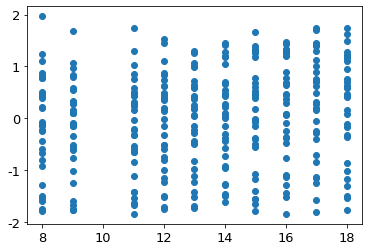

In [834]:
x=reg_Family_cohesion['Year']
plt.scatter(x,y)

In [837]:
y=reg_Social_influence['Social influence']
x=reg_Social_influence['Year']
x = sm.add_constant(x)

model_Social_influence=sm.OLS(y,x).fit()
model_Social_influence.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Social influence   R-squared:                       0.178
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     66.82
Date:                Thu, 17 Dec 2020   Prob (F-statistic):           7.84e-15
Time:                        17:18:46   Log-Likelihood:                -376.21
No. Observations:                 310   AIC:                             756.4
Df Residuals:                     308   BIC:                             763.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.5945      0.201     -7.952      0.000      -1.989      -1.200
Year           0.1199      0.015      8.174      0.000       0.091       0.149
==============================================================================
Omnibus:                       28.331   Durbin-Watson:                   1.336
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.033
Skew:                          -0.598   Prob(JB):                     4.52e-10
Kurtosis:                       4.380   Cond. No.                         59.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [835]:
reg_Social_influence

,reg,Year,Social influence
0,北京市,18,1.861989
1,天津市,18,0.584042
2,上海市,18,1.287237
3,重庆市,18,0.818915
4,河北省,18,0.675368
...,...,...,...
336,陕西省,8,-0.738151
337,甘肃省,8,-1.546806
338,青海省,8,-2.222137
339,宁夏回族自治区,8,-1.722700


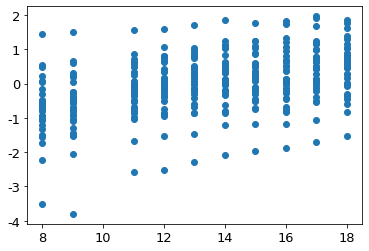

In [838]:
x=reg_Social_influence['Year']
plt.scatter(x,y)

In [842]:
df_sum3

,Unnamed: 0,reg,Year,divorce_rate,regional_gdp,consume,illteracy,sample_pop,density,highedu,birth,family_peoplenum,family_num,House_Price,tertiary_gdp,raising_rate,sex_ratio
0,0,北京市,2018,3.427825,33105.97,102.488458,268.0,15823.0,1135.527118,5268.000000,8.24,16773.0,6769.0,37420.188541,27508.06,13.37,98.75
1,1,天津市,2018,4.111147,13362.92,101.950745,159.0,11480.0,5016.304411,4150.000000,6.67,11278.0,4529.0,15924.260523,8352.32,13.03,115.72
2,2,上海市,2018,2.438029,36011.82,101.588254,426.0,17922.0,3822.695371,3517.000000,7.20,19368.0,8139.0,28981.105706,25546.26,13.08,106.61
3,3,重庆市,2018,4.963452,21588.80,102.047067,808.0,21113.0,2026.424731,3081.000000,11.02,24920.0,8685.0,8189.976022,11367.89,24.68,100.35
4,4,河北省,2018,3.110862,32494.61,102.448942,1994.0,50466.0,3210.355015,2457.000000,11.26,61115.0,19693.0,7566.719898,16251.96,26.85,101.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,336,陕西省,2008,NaN,7314.58,106.359070,2326.0,28407.0,5488.000000,2879.911953,10.29,33636.0,10616.0,2821.000000,2699.74,22.24,102.79
337,337,甘肃省,2008,NaN,3166.82,108.209650,3349.0,18840.0,3802.000000,1686.836072,13.22,23717.0,6594.0,1851.000000,1234.21,28.99,102.39
338,338,青海省,2008,NaN,1018.62,110.086500,654.0,3919.0,2051.000000,1033.242754,14.49,4963.0,1365.0,2384.000000,355.93,30.44,101.61
339,339,宁夏回族自治区,2008,NaN,1203.92,108.480960,430.0,4267.0,883.000000,1610.245902,14.31,5520.0,1549.0,2215.000000,475.00,32.39,103.71


In [855]:
divorce_rate=df_sum3.iloc[:,:4]

In [856]:
divorce_rate.drop('Unnamed: 0',axis=1,inplace=True)

In [1]:
from pyecharts import options as opts
from pyecharts.charts import Map, Timeline
from pyecharts.render import make_snapshot
from snapshot_selenium import snapshot

In [858]:
divorce_rate.dropna()

,reg,Year,divorce_rate
0,北京市,2018,3.427825
1,天津市,2018,4.111147
2,上海市,2018,2.438029
3,重庆市,2018,4.963452
4,河北省,2018,3.110862
...,...,...,...
243,陕西省,2011,1.760000
244,甘肃省,2011,1.130000
245,青海省,2011,1.700000
246,宁夏回族自治区,2011,2.080000


In [41]:
divorce_rate=pd.read_excel('province_divorce_rate2.xlsx')

In [42]:
divorce_rate

,reg,北京,天津,上海,重庆,河北,山西,内蒙古,辽宁,吉林,...,海南,四川,贵州,云南,西藏,陕西,甘肃,青海,宁夏,新疆
0,2010,2.367564,2.373934,2.082899,3.934801,2.038234,1.228313,2.312185,2.937161,3.426810,...,1.038888,2.723365,1.824417,1.504481,0.669208,1.715382,1.094843,1.427590,1.907548,4.512241
1,2011,3.450000,3.240000,3.390000,3.740000,2.140000,1.370000,2.720000,3.270000,3.720000,...,1.220000,2.570000,1.720000,1.640000,0.680000,1.760000,1.130000,1.700000,2.080000,4.810000
2,2012,2.350000,2.570000,2.220000,4.270000,2.350000,1.460000,2.830000,3.220000,4.030000,...,1.360000,3.110000,2.330000,1.760000,0.430000,1.890000,1.280000,1.860000,2.320000,4.620000
3,2013,3.060000,3.070000,2.880000,4.500000,2.440000,1.680000,3.230000,3.470000,4.510000,...,1.470000,3.310000,2.450000,1.950000,0.570000,2.140000,1.490000,1.870000,2.430000,4.820000
4,2014,3.076270,2.977565,2.540060,4.448250,2.524007,1.802285,3.535129,3.478305,4.438247,...,1.568970,3.384854,2.730683,2.137418,0.838641,2.258407,1.632760,2.161366,2.404749,4.735895
5,2015,3.785997,3.356884,2.758261,4.551740,2.680781,1.970715,3.659219,3.476677,4.628042,...,1.661581,3.488335,3.070680,2.300148,0.732716,2.565225,1.776346,2.172279,2.636047,4.312881
6,2016,4.893282,4.236537,3.407700,4.603739,2.964265,2.087870,3.915032,3.651606,4.711735,...,1.826970,3.612125,3.427448,2.515815,1.075165,2.673602,1.935305,2.576983,2.924785,3.984840
7,2017,3.711832,3.775441,2.430757,4.927029,3.100547,2.226733,3.997861,3.814268,4.904404,...,1.933478,3.763994,3.768886,2.656101,1.204790,2.844561,2.067876,2.757011,3.268828,3.071567
8,2018,3.427825,4.111147,2.438029,4.963452,3.110862,2.358841,3.902405,3.951422,4.752945,...,2.104692,3.756066,4.224457,2.767312,1.370113,3.336494,2.196623,2.848580,3.332287,2.413824


In [145]:
import pandas
from pyecharts.charts import Map
from pyecharts import options as opts
from pyecharts.charts import Timeline

In [146]:
#divorce_rate.set_index('reg')

In [147]:
attr = divorce_rate.columns.tolist()

In [148]:
attr=attr[1:]

In [195]:
def map_visualmap(sequence, date) -> Map:
    c = (
        Map()
        .add(date, sequence, maptype="china",is_map_symbol_show=False)
        .set_series_opts(label_opts=opts.LabelOpts(is_show=True))
        .set_global_opts(
            title_opts=opts.TitleOpts(title="China provincial divorce rate",pos_left='center'),
            visualmap_opts=opts.VisualMapOpts(max_=5.5,min_=0,
                                              is_piecewise=False,
            range_color=['#FAF8AB', '#FC3601']# 这里修改颜色，低、中、高
            ),
            legend_opts=opts.LegendOpts(is_show=False)
        )
    )
    return c

In [196]:
row = divorce_rate.iloc[1,1:].tolist()

In [197]:
timeline = Timeline()

In [198]:
n = len(divorce_rate.index)

In [199]:
for i in range(n):
#取每日数据
    row = divorce_rate.iloc[i,1:].tolist()
#将数据转换为二元的列表
    sequence_temp = list(zip(attr,row))
#对日期格式化以便显示
    time = str(divorce_rate.reg[i])
#创建地图
    map_temp = map_visualmap(sequence_temp,time)
#将地图加入时间轴对象
    timeline.add(map_temp,time).add_schema(play_interval=300,symbol='diamond')
# 地图创建完成后，通过render()方法可以将地图渲染为html
timeline.render('China provincial divorce rate.html')

'E:\\pythoncode\\final work\\China provincial divorce rate.html'

In [144]:
time = format(divorce_rate.index[2])

In [35]:
time

'2'

In [52]:
divorce_rate.reg[i]

2018

In [40]:
list(divorce_rate.index)

[0, 1, 2, 3, 4, 5, 6, 7, 8]